In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
#Import MMT functions
import sys
file_path = '/Users/cesileyking/Desktop/'  #insert your file path here
sys.path.insert(1,file_path+'map_multi_tool-Crosstalk/')
from MMTModules import *
%matplotlib inline

#tweaking Alec's MMT functions
def generate_focal_plane_distribution(path_to_positions, num_det, freq1, freq2, rescale):
     #Cesiley's tweak: switched input from freqs to freq1, freq2 because inputting freqs was throwing an error for some reason, but this is probably just Cesiley's own problem               
     # also reads in detector info one at a time, so no detector order is assumed
    '''
    generates the focal plane distribution given by the associated input text file
    
    returns a dictionary of identifying information for each detector including numerology, position, band frequency, polarization angle, and signal magnitude
    
    Inputs:
    ****************************************************************************
    path_to_positions [string]: the path and filename to find where the text file containing the positional information is located for the focal plane
    num_det [int]: the number of detectors
    freqs [1D array]: array of band frequencies
    rescale [float]: amount to globally scale the positions relative to the center of the focal plane
    ****************************************************************************
    
    Outputs:
    ****************************************************************************
    det_dict [dictionary]: dictionary of identifying information for detectors in focal plane
    ****************************************************************************
    '''
    
    import pandas as pd
    import numpy as np
    import random
    
    #Load spatial data

    #load from csv
    det_pos = pd.read_csv(path_to_positions, sep = ' ', names = ['ID','x','y','pol_ang','row','col'])
    deg_to_rad = np.pi / 180.

    x_pos_freq1 = []
    y_pos_freq1 = []
    x_pos_freq2 = []
    y_pos_freq2 = []
    det_ID_freq1 = []
    det_ID_freq2 = []
    det_pol_ang_freq1 = []
    det_pol_ang_freq2 = []
    
    row_freq1 = []
    row_freq2 = []
    col_freq1 = []
    col_freq2 = []
    
    
    #for i in range(0,num_det,1):
    i=0
    while i<len(det_pos['x']):
        
        #print(det_pos['ID'][i],det_pos['row'][i],det_pos['col'][i])
        
        #90 GHz
        if det_pos['ID'][i][4]=='9':

            x_pos_freq1.append( rescale * det_pos['x'][i] )
            #x_pos_freq1.append( rescale * det_pos['x'][i+1] )
            y_pos_freq1.append( rescale * det_pos['y'][i] )
            #y_pos_freq1.append( rescale * det_pos['y'][i+1] )
            det_ID_freq1.append( det_pos['ID'][i] )
            #det_ID_freq1.append( det_pos['ID'][i+1] )
            #round pol angle to nearest 0.x b/c of numerical errors
            det_pol_ang_freq1.append(det_pos['pol_ang'][i] )
            #det_pol_ang_freq1.append( round(det_pos['pol_ang'][i+1],1) )
            row_freq1.append(det_pos['row'][i])
            col_freq1.append(det_pos['col'][i])

        else:
        #150 GHz
            x_pos_freq2.append( rescale * det_pos['x'][i] )
            #x_pos_freq2.append( rescale * det_pos['x'][i+3] )
            y_pos_freq2.append( rescale * det_pos['y'][i] )
            #y_pos_freq2.append( rescale * det_pos['y'][i+3] )
            det_ID_freq2.append( det_pos['ID'][i] )
            #det_ID_freq2.append( det_pos['ID'][i+3] )
            #round pol angle to nearest 0.x b/c of numerical errors
            det_pol_ang_freq2.append(det_pos['pol_ang'][i] )
            #det_pol_ang_freq2.append( round(det_pos['pol_ang'][i+3],1) )
            row_freq2.append(det_pos['row'][i])
            col_freq2.append(det_pos['col'][i])
            
        i+=1

    #label pol angle information into xyab axes in degrees
    #global_x_ang = np.min(det_pol_ang_freq1)
    #global_y_ang = global_x_ang + 90
    #global_a_ang = global_x_ang + 45
    #global_b_ang = global_a_ang + 90

    #num_det = len(det_pos['x']) #change to number of rows in spatial data
    det_list = np.arange(1,len(x_pos_freq1),1)
    freqs = [freq1,freq2]
    det_dict = {}
    det_dict[freqs[0]] = {}
    det_dict[freqs[1]] = {}
    for freq in freqs:
        
        for det in range(len(x_pos_freq1)):
            
            det_dict[freqs[0]][det] = {}
            det_dict[freqs[0]][det]['x'] = x_pos_freq1[det]
            det_dict[freqs[0]][det]['y'] = y_pos_freq1[det]
            det_dict[freqs[0]][det]['ID'] = det_ID_freq1[det]
            #python uses radians in trig functions
            det_dict[freqs[0]][det]['ang'] = det_pol_ang_freq1[det]*deg_to_rad
            det_dict[freqs[0]][det]['sig'] = 1.
            det_dict[freqs[0]][det]['status'] = 'alive'
            det_dict[freqs[0]][det]['row'] = row_freq1[det]
            det_dict[freqs[0]][det]['column'] = col_freq1[det]
            #if det_dict[freqs[0]][det]['ang'] == global_x_ang:
            #    det_dict[freqs[0]][det]['axis'] = 'x'
            #elif det_dict[freqs[0]][det]['ang'] == global_y_ang:
            #    det_dict[freqs[0]][det]['axis'] = 'y'
            #elif det_dict[freqs[0]][det]['ang'] == global_a_ang:
            #    det_dict[freqs[0]][det]['axis'] = 'a'
            #elif det_dict[freqs[0]][det]['ang'] == global_b_ang:
            #    det_dict[freqs[0]][det]['axis'] = 'b'
            #else:
            #    print('no pol angle information found')

            det_dict[freqs[1]][det] = {}
            det_dict[freqs[1]][det]['x'] = x_pos_freq2[det]
            det_dict[freqs[1]][det]['y'] = y_pos_freq2[det]
            det_dict[freqs[1]][det]['ID'] = det_ID_freq2[det]
            #python uses radians for trig functions
            det_dict[freqs[1]][det]['ang'] = det_pol_ang_freq2[det]*deg_to_rad
            det_dict[freqs[1]][det]['sig'] = 1.
            det_dict[freqs[1]][det]['status'] = 'alive'
            det_dict[freqs[1]][det]['row'] = row_freq2[det]
            det_dict[freqs[1]][det]['column'] = col_freq2[det]
            #if det_dict[freqs[1]][det]['ang'] == global_x_ang:
            #    det_dict[freqs[1]][det]['axis'] = 'x'
            #elif det_dict[freqs[1]][det]['ang'] == global_y_ang:
            #    det_dict[freqs[1]][det]['axis'] = 'y'
            #elif det_dict[freqs[1]][det]['ang'] == global_a_ang:
            #    det_dict[freqs[1]][det]['axis'] = 'a'
            #elif det_dict[freqs[1]][det]['ang'] == global_b_ang:
            #    det_dict[freqs[1]][det]['axis'] = 'b'
            #else:
            #    print('no pol angle information found')

    print('The wafer information has a spread of ' + str(np.nanmax(x_pos_freq1) - np.nanmin(x_pos_freq1)) + ' degrees in x')
    print('The wafer information has a spread of ' + str(np.nanmax(y_pos_freq1) - np.nanmin(y_pos_freq1)) + ' degrees in y')
    #assign detector taus
    #define detector time constants (sampling from a gamma distribution)
    #det_dict = sample_det_tau(det_dict)
    return det_dict


def calculate_crosstalk2(det_dict, coupling_dict, coupling_dict2, freq1, freq2, pixel_size, perc_corr, N, beam_fwhm, delta_ell, ell_max, unconvolved_beams=None):

    import numpy as np
    import matplotlib.pyplot as plt
    
    #Cesiley's tweaks: again changed inpute from freqs to freq1, freq2
     #also tweaked beam matrix plotting to not use a log scale              
    '''
    calculates and returns the 3x3 beam coupling matrix given a crosstalk matrix (coupling_dict) and a detector layout specified in det_dict. Then convolves the pixel beam matrix components with the instrument beam and plots the beam coupling matrix in real space on a log scale.
    
    
    Inputs:
    ****************************************************************************
    det_dict [dictionary]: dictionary containing identifying information for the detectors in the focal plane
    coupling_dict [dictionary]: crosstalk matrix defining the detector to detector coupling
    freqs [2D array]: list of band frequencies being considered for the analysis
    pixel_size [float]: size of each pixel in arcmin
    perc_corr [float]: percent to which the crosstalk signal is correlated to the carrier signal
    N [int]: number of pixels along a map edge
    beam_fwhm [float]: 3dB point of gaussian beam
    sky_decomp [1D array]: a list of either the linear decomposition of the sky signal in IQU space or CMB realizations of I, Q, and U maps without instrument and observation effects
    TtoP_suppress [boolean]: sets the central value of T->P coupling maps to zero in where it otherwise may not be due to an imbalance of pair-differenced detectors
    delta_ell [int]: bin size of power spectra in ell
    ell_max [int]: maximum ell of power spectra calculation
    choose_normalization [string or 0]: if string it will be a key of the autospectra (TT for example), this will normalize every leakage spectra to the peak of this particular autospectra. If 0 is entered, each spectra is peak normalized.
    unconvolved_beams [dictionary]: *Deprecated do not use*
    ****************************************************************************
    
    Outputs:
    ****************************************************************************
    convolved_coupled_beams [dictionary]: 3x3 beam coupling matrix
    ****************************************************************************
    '''
    
    
    #run a simulation
    beam_matrix = calculate_beam_matrix(det_dict, coupling_dict, coupling_dict2, freq1, freq2, pixel_size, perc_corr, N)
    II_total = beam_matrix['II']
    IQ_total = beam_matrix['IQ']
    IU_total = beam_matrix['IU']
    QI_total = beam_matrix['QI']
    QQ_total = beam_matrix['QQ']
    QU_total = beam_matrix['QU']
    UI_total = beam_matrix['UI']
    UQ_total = beam_matrix['UQ']
    UU_total = beam_matrix['UU']

    #convolve with instrument beam and organize into dictionaries
    coupled_beams = {}
    inst_beam_1 = offset_2d_gaussian_beam(N, pixel_size, beam_fwhm,0,0)
    coupled_beams_keys = ['II','QI','UI','IQ','QQ','UQ','IU','QU','UU']
    beams_list = [II_total, QI_total, UI_total, IQ_total, QQ_total, UQ_total, IU_total, QU_total, UU_total]
    convolved_coupled_beams = {}
    for i in range(len(coupled_beams_keys)):
        coupled_beams[coupled_beams_keys[i]] = beams_list[i]

    for i in range(len(coupled_beams_keys)):
        convolved_coupled_beams[coupled_beams_keys[i]] = convolve_pixel_instrument(coupled_beams[coupled_beams_keys[i]],inst_beam_1)
    
        
    #Plot beam maps in 3x3 matrix
    fig, ax = plt.subplots(3,3, figsize=(20,20))
    
    #tiny offset to avoid numerical errors in log space
    eta = 0.0000001
    
    #make colormap relative to II beam
    #vmin = 10.*np.log(np.min(II_total) + eta)
    #vmax = 10.*np.log(np.max(II_total) + eta)
    
    vmin = np.min(II_total)
    vmax = np.max(II_total)

    #II
    #ax[0,0].imshow(10. * np.log(np.abs(convolved_coupled_beams['II']) + eta),vmin=vmin,vmax=vmax)
    im=ax[0,0].imshow(((convolved_coupled_beams['II'])))#,vmin=vmin,vmax=vmax)
    ax[0,0].set_xlabel('X Pixel')
    ax[0,0].set_ylabel('Y Pixel')
    ax[0,0].set_title('II Beam')
    #ax[0,0].set_xlim(970,1030)
    #ax[0,0].set_ylim(970,1030)
    ax[0,0].set_xlim(990,1010)
    ax[0,0].set_ylim(990,1010)
    plt.colorbar(im,ax=ax[0,0])
    
    
    #IQ
    #ax[0,1].imshow(10. * np.log(np.abs(convolved_coupled_beams['IQ']) + eta),vmin=vmin,vmax=vmax)
    im=ax[0,1].imshow(((convolved_coupled_beams['IQ'])))#,vmin=vmin,vmax=vmax)
    ax[0,1].set_xlabel('X Pixel')
    ax[0,1].set_ylabel('Y Pixel')
    ax[0,1].set_title('IQ Beam')
    #ax[0,1].set_xlim(970,1030)
    #ax[0,1].set_ylim(970,1030)
    ax[0,1].set_xlim(990,1010)
    ax[0,1].set_ylim(990,1010)
    plt.colorbar(im,ax=ax[0,1])
    


    #IU
    #ax[0,2].imshow(10. * np.log(np.abs(convolved_coupled_beams['IU']) + eta),vmin=vmin,vmax=vmax)
    im=ax[0,2].imshow(((convolved_coupled_beams['IU'])))#,vmin=vmin,vmax=vmax)
    ax[0,2].set_xlabel('X Pixel')
    ax[0,2].set_ylabel('Y Pixel')
    ax[0,2].set_title('IU beam')
    #ax[0,2].set_xlim(970,1030)
    #ax[0,2].set_ylim(970,1030)
    ax[0,2].set_xlim(990,1010)
    ax[0,2].set_ylim(990,1010)
    plt.colorbar(im,ax=ax[0,2])

    #QI
    #ax[1,0].imshow(10.*np.log(np.abs(convolved_coupled_beams['QI']) + eta),vmin=vmin,vmax=vmax)
    im=ax[1,0].imshow(((convolved_coupled_beams['QI'])))#,vmin=vmin,vmax=vmax)
    ax[1,0].set_xlabel('X Pixel')
    ax[1,0].set_ylabel('Y Pixel')
    ax[1,0].set_title('QI beam')
    #ax[1,0].set_xlim(970,1030)
    #ax[1,0].set_ylim(970,1030)
    ax[1,0].set_xlim(990,1010)
    ax[1,0].set_ylim(990,1010)
    plt.colorbar(im,ax=ax[1,0])
    
    #QQ
    #ax[1,1].imshow(10. * np.log(np.abs(convolved_coupled_beams['QQ']) + eta),vmin=vmin,vmax=vmax)
    im=ax[1,1].imshow(((convolved_coupled_beams['QQ'])))#,vmin=vmin,vmax=vmax)
    ax[1,1].set_xlabel('X Pixel')
    ax[1,1].set_ylabel('Y Pixel')
    ax[1,1].set_title('QQ beam')
    #ax[1,1].set_xlim(970,1030)
    #ax[1,1].set_ylim(970,1030)
    ax[1,1].set_xlim(990,1010)
    ax[1,1].set_ylim(990,1010)
    plt.colorbar(im,ax=ax[1,1])
    
    #QU
    #ax[1,2].imshow(10. * np.log(np.abs(convolved_coupled_beams['QU']) + eta),vmin=vmin,vmax=vmax)
    im=ax[1,2].imshow(((convolved_coupled_beams['QU'])))#,vmin=vmin,vmax=vmax)
    ax[1,2].set_xlabel('X Pixel')
    ax[1,2].set_ylabel('Y Pixel')
    ax[1,2].set_title('QU beam')
    #ax[1,2].set_xlim(970,1030)
    #ax[1,2].set_ylim(970,1030)
    ax[1,2].set_xlim(990,1010)
    ax[1,2].set_ylim(990,1010)
    plt.colorbar(im,ax=ax[1,2])

    #UI
    #ax[2,0].imshow(10. * np.log(np.abs(convolved_coupled_beams['UI']) + eta),vmin=vmin,vmax=vmax)
    im=ax[2,0].imshow(((convolved_coupled_beams['UI'])))#,vmin=vmin,vmax=vmax)
    ax[2,0].set_xlabel('X Pixel')
    ax[2,0].set_ylabel('Y Pixel')
    ax[2,0].set_title('UI beam')
    #ax[2,0].set_xlim(970,1030)
    #ax[2,0].set_ylim(970,1030)
    ax[2,0].set_xlim(990,1010)
    ax[2,0].set_ylim(990,1010)
    plt.colorbar(im,ax=ax[2,0])

    #UQ
    #ax[2,1].imshow(10. * np.log(np.abs(convolved_coupled_beams['UQ']) + eta),vmin=vmin,vmax=vmax)
    ax[2,1].imshow(((convolved_coupled_beams['UQ'])))#,vmin=vmin,vmax=vmax)
    ax[2,1].set_xlabel('X Pixel')
    ax[2,1].set_ylabel('Y Pixel')
    ax[2,1].set_title('UQ beam')
    #ax[2,1].set_xlim(970,1030)
    #ax[2,1].set_ylim(970,1030)
    ax[2,1].set_xlim(990,1010)
    ax[2,1].set_ylim(990,1010)
    plt.colorbar(im,ax=ax[2,1])

    #UU
    #ax[2,2].imshow(10. * np.log(np.abs(convolved_coupled_beams['UU']) + eta),vmin=vmin,vmax=vmax)
    im=ax[2,2].imshow(((convolved_coupled_beams['UU'])))#,vmin=vmin,vmax=vmax)
    ax[2,2].set_xlabel('X Pixel')
    ax[2,2].set_ylabel('Y Pixel')
    ax[2,2].set_title('UU beam')
    #ax[2,2].set_xlim(970,1030)
    #ax[2,2].set_ylim(970,1030)
    ax[2,2].set_xlim(990,1010)
    ax[2,2].set_ylim(990,1010)
    plt.colorbar(im,ax=ax[2,2])
    
    #plt.savefig("Beam Matrix.png")
    #fig.colorbar(ax[0,0].imshow(((convolved_coupled_beams['II'])),vmin=vmin,vmax=vmax),ax=ax.ravel().tolist())
    plt.show()

    return convolved_coupled_beams


def get_leakage_spectra2(convolved_coupled_beams, pixel_size, N, beam_fwhm, sky_decomp, delta_ell, ell_max, choose_normalization):
    
    #Cesiley's tweaks: made sure during normalization step, everything was just divided by the normalization factor once
     #              : removed plotting
        #           : added instrument beam TT to returns 
    '''
    from a given beam coupling matrix, calculates the detector measurements of I, Q, and U maps using the sky_decomp, takes the 2D FFT and azimuthally averages to power spectra. This function does not deconvolve the delta function bias that is present in get_leakage_beams. This function then plots the 1D spectra along with the instrument beam provided by the input parameters with a user defined normalization chosen by choose_normalization.
    
    returns plots and leakage spectra which are convolved with E and B maps (NOT solely the leakage beams!). returns an array of binned ells and a dictionary of spectra TT, EE, BB, TE, TB, and EB
    
    Inputs:
    ****************************************************************************
    convolved_coupled_beams [dictionary]: 3x3 beam coupling matrix
    pixel_size [float]: size of each pixel in arcmin
    N [int]: number of pixels along a map edge
    beam_fwhm [float]: 3dB point of gaussian beam
    sky_decomp [1D array]: a list of either the linear decomposition of the sky signal in IQU space or CMB realizations of I, Q, and U maps without instrument and observation effects
    delta_ell [int]: bin size for calculating power spectra
    ell_max [int]: maximum ell for power spectra calculation
    choose_normalization [str or 0]: if string it will be a key of the autospectra (TT for example), this will normalize every leakage spectra to the peak of this particular autospectra. If 0 is entered, each spectra is peak normalized.
    ****************************************************************************
    
    Outputs:
    ****************************************************************************
    binned_ell [1D array]: array of ell bins for averaging map powers
    binned_spectra_dict [dictionary]: dictionary of TT, TE, EE, etc spectra
    ****************************************************************************
    '''
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    
    #make instrument beam
    inst_beam_1 = offset_2d_gaussian_beam(N, pixel_size, beam_fwhm,0,0)
    
    #Generate 1D power spectra from beam maps
    pix_size = pixel_size * 60. #pixel size in arcmin
    Imap = sky_decomp[0] * convolved_coupled_beams['II'] + sky_decomp[1] * convolved_coupled_beams['IQ'] + sky_decomp[2] * convolved_coupled_beams['IU']
    Qmap = sky_decomp[0] * convolved_coupled_beams['QI'] + sky_decomp[1] * convolved_coupled_beams['QQ'] + sky_decomp[2] * convolved_coupled_beams['QU']
    Umap = sky_decomp[0] * convolved_coupled_beams['UI'] + sky_decomp[1] * convolved_coupled_beams['UQ'] + sky_decomp[2] * convolved_coupled_beams['UU']
    
    #This now returns just 2d maps dictionary
    maps_dict = calculate_2d_spectra(Imap=Imap, Qmap=Qmap, Umap=Umap, delta_ell=delta_ell, ell_max=ell_max, pix_size=pix_size, N=N)
    
    binned_ell, binned_spectra_dict = bin_maps_to_1d(maps_dict, delta_ell=delta_ell, ell_max=ell_max, pix_size=pix_size, N=N)
#    binned_ell, binned_spectra_dict = calculate_2d_spectra(Imap=Imap, Qmap=Qmap, Umap=Umap, delta_ell=delta_ell, ell_max=ell_max, pix_size=pix_size, N=N, unconvolved_beams=unconvolved_beams)

    beam_maps_dict = calculate_2d_spectra(Imap=inst_beam_1, delta_ell=delta_ell, ell_max=ell_max, pix_size=pix_size, N=N)
    binned_ell, beam_spectrum = bin_maps_to_1d(beam_maps_dict, delta_ell=delta_ell, ell_max=ell_max, pix_size=pix_size, N=N)


    
    if choose_normalization == 0:
        #normalize all PS to 1
        binned_spectra_dict['TT'] = binned_spectra_dict['TT'][1:] / np.nanmax(binned_spectra_dict['TT'][1:])
        binned_spectra_dict['EE'] = binned_spectra_dict['EE'][1:] / np.nanmax(binned_spectra_dict['EE'][1:])
        binned_spectra_dict['BB'] = binned_spectra_dict['BB'][1:] / np.nanmax(binned_spectra_dict['BB'][1:])
        binned_spectra_dict['TE'] = binned_spectra_dict['TE'][1:] / np.nanmax(np.abs(binned_spectra_dict['TE'][1:]))
        binned_spectra_dict['EB'] = binned_spectra_dict['EB'][1:] / np.nanmax(np.abs(binned_spectra_dict['EB'][1:]))
        binned_spectra_dict['TB'] = binned_spectra_dict['TB'][1:] / np.nanmax(np.abs(binned_spectra_dict['TB'][1:]))
        beam_spectrum['TT'] = beam_spectrum['TT'][1:] / np.nanmax(beam_spectrum['TT'][1:])

    else:
        #normalize to leakage study
        if choose_normalization is 'TT':
            norm_fac = binned_spectra_dict['TT'][1:]
        elif choose_normalization is 'EE':
            norm_fac = binned_spectra_dict['EE'][1:]
        elif choose_normalization is 'BB':
            norm_fac = binned_spectra_dict['BB'][1:]
        else:
            print('Please use either TT, EE, or BB keys to study leakage effects')

        beam_spectrum['TT'] = beam_spectrum['TT'][1:] / np.nanmax(beam_spectrum['TT'][1:])
        binned_spectra_dict['TT'] = binned_spectra_dict['TT'][1:] / norm_fac
        binned_spectra_dict['EE'] = binned_spectra_dict['EE'][1:] / norm_fac
        binned_spectra_dict['BB'] = binned_spectra_dict['BB'][1:] / norm_fac
        binned_spectra_dict['TE'] = binned_spectra_dict['TE'][1:] / (norm_fac)
        binned_spectra_dict['EB'] = binned_spectra_dict['EB'][1:] / (norm_fac)
        binned_spectra_dict['TB'] = binned_spectra_dict['TB'][1:] / (norm_fac)


    #unconvolved_beams = beam_matrix
    #return beam maps and raw power spectra
    return binned_ell[1:], binned_spectra_dict, beam_spectrum['TT']



def crosstalk_pix_map(det, det_dict, coupling_dict, coupling_dict2, freq1, freq2, perc_corr, empty_beam_map, pixel_size):
    
    #Cesiley's tweak: when defining coupled_det, the first key should be freq2 (originally it was freq1, so no freq 2 detector was being called at all you're just coupling freq1 with freq1, which would only be the case if freq1=freq2)
                  # : changed = to += when adding crosstalk pixels to map so as not to overwrite previous value, but rather add to it
                  # : added second coupling dictionary to arguments to get crosstalk coming from two different pixels instead of just one
    import math
    import numpy as np
    #number of pixels on each map edge
    N = len(empty_beam_map[0])
    
    #initialize pixel maps
    pixel_map_x = empty_beam_map.copy()
    pixel_map_y = empty_beam_map.copy()
    pixel_map_a = empty_beam_map.copy()
    pixel_map_b = empty_beam_map.copy()
    
    
    #crosstalk depends on relative orientation between detectors
    if coupling_dict[(freq1,freq2)][det] == 'na':
        
        crosstalk = 0
        
        i = 0
        j = 0
    else:
        
        #take coupled value and calculate crosstalk
        coupled_det = det_dict[freq2][coupling_dict[(freq1,freq2)][det]]
        crosstalk = ( math.cos(det_dict[freq1][det]['ang'] - coupled_det['ang']) * coupled_det['sig'])
        
        #add to the relative offset in this pixel map
        i = int(coupled_det['x']/pixel_size + N/2 - det_dict[freq1][det]['x']/pixel_size)
        j = int(coupled_det['y']/pixel_size + N/2 - det_dict[freq1][det]['y']/pixel_size)
    
    

    #make x, y, a, b maps
    det_ang = det_dict[freq1][det]['ang']
    
    #for contribution to global x,y,a,b
    pixel_map_x[int(N/2),int(N/2)] = (det_dict[freq1][det]['sig'] * math.cos(det_ang - 0.))**2.
    pixel_map_y[int(N/2),int(N/2)] = (det_dict[freq1][det]['sig'] * math.cos(det_ang - np.pi/2.))**2.
    pixel_map_a[int(N/2),int(N/2)] = (det_dict[freq1][det]['sig'] * math.cos(det_ang - np.pi/4.))**2.
    pixel_map_b[int(N/2),int(N/2)] = (det_dict[freq1][det]['sig'] * math.cos(det_ang - 3*np.pi/4.))**2.
    
    #add crosstalk signal projections
    pixel_map_x[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 0.))**2.
    pixel_map_y[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/2.))**2.
    pixel_map_a[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/4.))**2.
    pixel_map_b[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 3*np.pi/4.))**2.
    
        ##
    if coupling_dict2[(freq1,freq2)][det] == 'na':
        crosstalk = 0
        
        i = 0
        j = 0
        
    else:
        #take coupled value and calculate crosstalk
        coupled_det = det_dict[freq2][coupling_dict2[(freq1,freq2)][det]]
        crosstalk = ( math.cos(det_dict[freq1][det]['ang'] - coupled_det['ang']) * coupled_det['sig'])
        
        #add to the relative offset in this pixel map
        i = int(coupled_det['x']/pixel_size + N/2 - det_dict[freq1][det]['x']/pixel_size)
        j = int(coupled_det['y']/pixel_size + N/2 - det_dict[freq1][det]['y']/pixel_size)
    
    
  
    #make x, y, a, b maps
    det_ang = det_dict[freq1][det]['ang']
        
    #add crosstalk signal projections
    pixel_map_x[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 0.))**2.
    pixel_map_y[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/2.))**2.
    pixel_map_a[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/4.))**2.
    pixel_map_b[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 3*np.pi/4.))**2.
    
    return pixel_map_x, pixel_map_y, pixel_map_a, pixel_map_b

def crosstalk_pix_map_pureEx(det, det_dict, coupling_dict, coupling_dict2, freq1, freq2, perc_corr, empty_beam_map, pixel_size):
    #Cesiley's tweak: same as crosstalk_pix_map

    '''
    calculates the crosstalk contribution to the global on sky (x) axis from a particular detector. the contribution is calculated by the trigonometry from the alignment of the detector, cross detector with the global x, y, a, b axes. 
    
    returns pixel maps with the new crosstalk contribution position and magnitude added
    
    Inputs:
    ****************************************************************************
    det [int]: the identifying number of the detector in question being crosstalked to
    det_dict [dictionary]: focal plane information storing detector number along with frequency response, angle relative to global sky coordinates, and signal magnitude
    coupling_dict [dictionary]: the crosstalk matrix that defines the detector to detector coupling
    freq1 [int]: first frequency being considered
    freq2 [int]: second frequency being considered, for crosstalk between adjacent bands these two numbers would be different
    perc_corr [float]: the percent to which the signals of the detectors are correlated
    empty_beam_map [2D array]: a copy of null beam maps to size the pixel beam maps appropriately
    pixel_size [float]: size of each pixel in the map in arcmin
    ****************************************************************************
    
    Outputs:
    ****************************************************************************
    pixel_map_x [2D array]: contribution of this detector and crosstalk signal along the global sky x axis
    pixel_map_y [2D array]: contribution of this detector and crosstalk signal along the global sky y axis
    pixel_map_a [2D array]: contribution of this detector and crosstalk signal along the global sky a axis
    pixel_map_b [2D array]: contribution of this detector and crosstalk signal along the global sky b axis
    ****************************************************************************
    '''
    
    import numpy as np
    import math
    
    #number of pixels along map edge
    N = len(empty_beam_map[0])
    
    #initialize pixel maps
    pixel_map_x = empty_beam_map.copy()
    pixel_map_y = empty_beam_map.copy()
    pixel_map_a = empty_beam_map.copy()
    pixel_map_b = empty_beam_map.copy()
    

    #crosstalk depends on relative orientation between detectors
    if coupling_dict[(freq1,freq2)][det] == 'na':
        crosstalk = 0
        
        i = 0
        j = 0
        
    else:
        #take coupled value and calculate crosstalk
        coupled_det = det_dict[freq2][coupling_dict[(freq1,freq2)][det]]
        crosstalk = ( math.cos(det_dict[freq1][det]['ang'] - coupled_det['ang']) * coupled_det['sig'])
    
        #add to the relative offset in this pixel map
        i = int(coupled_det['x']/pixel_size + N/2 - det_dict[freq1][det]['x']/pixel_size)
        j = int(coupled_det['y']/pixel_size + N/2 - det_dict[freq1][det]['y']/pixel_size)
  
    det_ang = det_dict[freq1][det]['ang']
    
    #for contribution to global x,y,a,b for pure Ex signal
    pixel_map_x[int(N/2),int(N/2)] = (det_dict[freq1][det]['sig'] * math.cos(det_ang - 0.))**2.
    pixel_map_y[int(N/2),int(N/2)] = 0.
    pixel_map_a[int(N/2),int(N/2)] = 0.
    pixel_map_b[int(N/2),int(N/2)] = 0.
    
    #add crosstalk signal projections
    pixel_map_x[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 0.))**2.
    pixel_map_y[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/2.))**2.
    pixel_map_a[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/4.))**2.
    pixel_map_b[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 3*np.pi/4))**2.
    
            
    ##
    if coupling_dict2[(freq1,freq2)][det] == 'na':
        crosstalk = 0
        
        i = 0
        j = 0
        
    else:
        #take coupled value and calculate crosstalk
        coupled_det = det_dict[freq2][coupling_dict2[(freq1,freq2)][det]]
        crosstalk = ( math.cos(det_dict[freq1][det]['ang'] - coupled_det['ang']) * coupled_det['sig'])
        
        #add to the relative offset in this pixel map
        i = int(coupled_det['x']/pixel_size + N/2 - det_dict[freq1][det]['x']/pixel_size)
        j = int(coupled_det['y']/pixel_size + N/2 - det_dict[freq1][det]['y']/pixel_size)
    
    
  
    #make x, y, a, b maps
    det_ang = det_dict[freq1][det]['ang']
        
    #add crosstalk signal projections
    pixel_map_x[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 0.))**2.
    pixel_map_y[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/2.))**2.
    pixel_map_a[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/4.))**2.
    pixel_map_b[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 3*np.pi/4.))**2.
 
    return pixel_map_x, pixel_map_y, pixel_map_a, pixel_map_b

def crosstalk_pix_map_pureEy(det, det_dict, coupling_dict, coupling_dict2, freq1, freq2, perc_corr, empty_beam_map, pixel_size):
    #Cesiley's tweak: same as crosstalk_pix_map
    
    '''
    calculates the crosstalk contribution to the global on sky (y) axis from a particular detector. the contribution is calculated by the trigonometry from the alignment of the detector, cross detector with the global x, y, a, b axes. 
    
    returns pixel maps with the new crosstalk contribution position and magnitude added
    
    Inputs:
    ****************************************************************************
    det [int]: the identifying number of the detector in question being crosstalked to
    det_dict [dictionary]: focal plane information storing detector number along with frequency response, angle relative to global sky coordinates, and signal magnitude
    coupling_dict [dictionary]: the crosstalk matrix that defines the detector to detector coupling
    freq1 [int]: first frequency being considered
    freq2 [int]: second frequency being considered, for crosstalk between adjacent bands these two numbers would be different
    perc_corr [float]: the percent to which the signals of the detectors are correlated
    empty_beam_map [2D array]: a copy of null beam maps to size the pixel beam maps appropriately
    pixel_size [float]: size of each pixel in the map in arcmin
    ****************************************************************************
    
    Outputs:
    ****************************************************************************
    pixel_map_x [2D array]: contribution of this detector and crosstalk signal along the global sky x axis
    pixel_map_y [2D array]: contribution of this detector and crosstalk signal along the global sky y axis
    pixel_map_a [2D array]: contribution of this detector and crosstalk signal along the global sky a axis
    pixel_map_b [2D array]: contribution of this detector and crosstalk signal along the global sky b axis
    ****************************************************************************
    '''
    
    import numpy as np
    import math
    
    #number of pixels along map edge
    N = len(empty_beam_map[0])
    
    #initialize pixel maps
    pixel_map_x = empty_beam_map.copy()
    pixel_map_y = empty_beam_map.copy()
    pixel_map_a = empty_beam_map.copy()
    pixel_map_b = empty_beam_map.copy()

    
    #crosstalk depends on relative orientation between detectors
    if coupling_dict[(freq1,freq2)][det] == 'na':
        crosstalk = 0
        
        i = 0
        j = 0
    else:
        #take coupled value and calculate crosstalk
        coupled_det = det_dict[freq2][coupling_dict[(freq1,freq2)][det]]
        crosstalk = ( math.cos(det_dict[freq1][det]['ang'] - coupled_det['ang']) * coupled_det['sig'])

        #add to the relative offset in this pixel map
        i = int(coupled_det['x']/pixel_size + N/2 - det_dict[freq1][det]['x']/pixel_size)
        j = int(coupled_det['y']/pixel_size + N/2 - det_dict[freq1][det]['y']/pixel_size)
  

    det_ang = det_dict[freq1][det]['ang']
    
    #make x, y, a, b maps
    #if aligned with global x, y        
    #for contribution to global x,y,a,b for pure Ex signal
    pixel_map_x[int(N/2),int(N/2)] = 0.
    pixel_map_y[int(N/2),int(N/2)] = (det_dict[freq1][det]['sig'] * math.cos(det_ang - np.pi/2.))**2.
    pixel_map_a[int(N/2),int(N/2)] = 0.
    pixel_map_b[int(N/2),int(N/2)] = 0.
    
    #add crosstalk signal projections
    pixel_map_x[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 0.))**2.
    pixel_map_y[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/2.))**2.
    pixel_map_a[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/4.))**2.
    pixel_map_b[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 3*np.pi/4))**2.
    
            
    ##
    if coupling_dict2[(freq1,freq2)][det] == 'na':
        crosstalk = 0
        
        i = 0
        j = 0
        
    else:
        #take coupled value and calculate crosstalk
        coupled_det = det_dict[freq2][coupling_dict2[(freq1,freq2)][det]]
        crosstalk = ( math.cos(det_dict[freq1][det]['ang'] - coupled_det['ang']) * coupled_det['sig'])
        
        #add to the relative offset in this pixel map
        i = int(coupled_det['x']/pixel_size + N/2 - det_dict[freq1][det]['x']/pixel_size)
        j = int(coupled_det['y']/pixel_size + N/2 - det_dict[freq1][det]['y']/pixel_size)
    
    
  
    #make x, y, a, b maps
    det_ang = det_dict[freq1][det]['ang']
        
    #add crosstalk signal projections
    pixel_map_x[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 0.))**2.
    pixel_map_y[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/2.))**2.
    pixel_map_a[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/4.))**2.
    pixel_map_b[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 3*np.pi/4.))**2.
    
    
    return pixel_map_x, pixel_map_y, pixel_map_a, pixel_map_b

def crosstalk_pix_map_pureEa(det, det_dict, coupling_dict, coupling_dict2, freq1, freq2, perc_corr, empty_beam_map, pixel_size):
    #Cesiley's tweak: same as crosstalk_pix_map
    '''
    calculates the crosstalk contribution to the global on sky (a) axis from a particular detector. the contribution is calculated by the trigonometry from the alignment of the detector, cross detector with the global x, y, a, b axes. 
    
    returns pixel maps with the new crosstalk contribution position and magnitude added
    
    Inputs:
    ****************************************************************************
    det [int]: the identifying number of the detector in question being crosstalked to
    det_dict [dictionary]: focal plane information storing detector number along with frequency response, angle relative to global sky coordinates, and signal magnitude
    coupling_dict [dictionary]: the crosstalk matrix that defines the detector to detector coupling
    freq1 [int]: first frequency being considered
    freq2 [int]: second frequency being considered, for crosstalk between adjacent bands these two numbers would be different
    perc_corr [float]: the percent to which the signals of the detectors are correlated
    empty_beam_map [2D array]: a copy of null beam maps to size the pixel beam maps appropriately
    pixel_size [float]: size of each pixel in the map in arcmin
    ****************************************************************************
    
    Outputs:
    ****************************************************************************
    pixel_map_x [2D array]: contribution of this detector and crosstalk signal along the global sky x axis
    pixel_map_y [2D array]: contribution of this detector and crosstalk signal along the global sky y axis
    pixel_map_a [2D array]: contribution of this detector and crosstalk signal along the global sky a axis
    pixel_map_b [2D array]: contribution of this detector and crosstalk signal along the global sky b axis
    ****************************************************************************
    '''
    
    import numpy as np
    import math
    
    #number of pixels along map edge
    N = len(empty_beam_map[0])
    
    #initialize pixel maps
    pixel_map_x = empty_beam_map.copy()
    pixel_map_y = empty_beam_map.copy()
    pixel_map_a = empty_beam_map.copy()
    pixel_map_b = empty_beam_map.copy()
    

    #crosstalk depends on relative orientation between detectors
    if coupling_dict[(freq1,freq2)][det] == 'na':
        crosstalk = 0
        
        i = 0
        j = 0
    else:
        #take coupled value and calculate crosstalk
        coupled_det = det_dict[freq2][coupling_dict[(freq1,freq2)][det]]
        crosstalk = ( math.cos(det_dict[freq1][det]['ang'] - coupled_det['ang']) * coupled_det['sig'])
    
        #add to the relative offset in this pixel map
        i = int(coupled_det['x']/pixel_size + N/2 - det_dict[freq1][det]['x']/pixel_size)
        j = int(coupled_det['y']/pixel_size + N/2 - det_dict[freq1][det]['y']/pixel_size)
  

    det_ang = det_dict[freq1][det]['ang']
    
    #make x, y, a, b maps
    #if aligned with global x, y        
    #for contribution to global x,y,a,b for pure Ex signal
    pixel_map_x[int(N/2),int(N/2)] = 0.
    pixel_map_y[int(N/2),int(N/2)] = 0.
    pixel_map_a[int(N/2),int(N/2)] = (det_dict[freq1][det]['sig'] * math.cos(det_ang - np.pi/4.))**2.
    pixel_map_b[int(N/2),int(N/2)] = 0.
    
    #add crosstalk signal projections
    pixel_map_x[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 0.))**2.
    pixel_map_y[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/2.))**2.
    pixel_map_a[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/4.))**2.
    pixel_map_b[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 3*np.pi/4))**2.
    
            
    ##
    if coupling_dict2[(freq1,freq2)][det] == 'na':
        crosstalk = 0
        
        i = 0
        j = 0
        
    else:
        #take coupled value and calculate crosstalk
        coupled_det = det_dict[freq2][coupling_dict2[(freq1,freq2)][det]]
        crosstalk = ( math.cos(det_dict[freq1][det]['ang'] - coupled_det['ang']) * coupled_det['sig'])
        
        #add to the relative offset in this pixel map
        i = int(coupled_det['x']/pixel_size + N/2 - det_dict[freq1][det]['x']/pixel_size)
        j = int(coupled_det['y']/pixel_size + N/2 - det_dict[freq1][det]['y']/pixel_size)
    
    
  
    #make x, y, a, b maps
    det_ang = det_dict[freq1][det]['ang']
        
    #add crosstalk signal projections
    pixel_map_x[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 0.))**2.
    pixel_map_y[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/2.))**2.
    pixel_map_a[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/4.))**2.
    pixel_map_b[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 3*np.pi/4.))**2.
    
    
    return pixel_map_x, pixel_map_y, pixel_map_a, pixel_map_b

def crosstalk_pix_map_pureEb(det, det_dict, coupling_dict, coupling_dict2, freq1, freq2, perc_corr, empty_beam_map, pixel_size):
    #Cesiley's tweak: same as crosstalk_pix_map
    '''
    calculates the crosstalk contribution to the global on sky (b) axis from a particular detector. the contribution is calculated by the trigonometry from the alignment of the detector, cross detector with the global x, y, a, b axes. 
    
    returns pixel maps with the new crosstalk contribution position and magnitude added
    
    Inputs:
    ****************************************************************************
    det [int]: the identifying number of the detector in question being crosstalked to
    det_dict [dictionary]: focal plane information storing detector number along with frequency response, angle relative to global sky coordinates, and signal magnitude
    coupling_dict [dictionary]: the crosstalk matrix that defines the detector to detector coupling
    freq1 [int]: first frequency being considered
    freq2 [int]: second frequency being considered, for crosstalk between adjacent bands these two numbers would be different
    perc_corr [float]: the percent to which the signals of the detectors are correlated
    empty_beam_map [2D array]: a copy of null beam maps to size the pixel beam maps appropriately
    pixel_size [float]: size of each pixel in the map in arcmin
    ****************************************************************************
    
    Outputs:
    ****************************************************************************
    pixel_map_x [2D array]: contribution of this detector and crosstalk signal along the global sky x axis
    pixel_map_y [2D array]: contribution of this detector and crosstalk signal along the global sky y axis
    pixel_map_a [2D array]: contribution of this detector and crosstalk signal along the global sky a axis
    pixel_map_b [2D array]: contribution of this detector and crosstalk signal along the global sky b axis
    ****************************************************************************
    '''
    
    import numpy as np
    import math
    
    #number of pixels along map edge
    N = len(empty_beam_map[0])
    
    #initialize pixel maps
    pixel_map_x = empty_beam_map.copy()
    pixel_map_y = empty_beam_map.copy()
    pixel_map_a = empty_beam_map.copy()
    pixel_map_b = empty_beam_map.copy()
    

    #crosstalk depends on relative orientation between detectors
    if coupling_dict[(freq1,freq2)][det] == 'na':
        crosstalk = 0
        
        i = 0
        j = 0
    else:
        #take coupled value and calculate crosstalk
        coupled_det = det_dict[freq2][coupling_dict[(freq1,freq2)][det]]
        crosstalk = ( math.cos(det_dict[freq1][det]['ang'] - coupled_det['ang']) * coupled_det['sig'])

        #add to the relative offset in this pixel map
        i = int(coupled_det['x']/pixel_size + N/2 - det_dict[freq1][det]['x']/pixel_size)
        j = int(coupled_det['y']/pixel_size + N/2 - det_dict[freq1][det]['y']/pixel_size)
  

    det_ang = det_dict[freq1][det]['ang']
    
    #make x, y, a, b maps
    #if aligned with global x, y        
    #for contribution to global x,y,a,b for pure Ex signal
    pixel_map_x[int(N/2),int(N/2)] = 0.
    pixel_map_y[int(N/2),int(N/2)] = 0.
    pixel_map_a[int(N/2),int(N/2)] = 0.
    pixel_map_b[int(N/2),int(N/2)] = (det_dict[freq1][det]['sig'] * math.cos(det_ang - 3*np.pi/4.))**2.
    
    #add crosstalk signal projections
    pixel_map_x[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 0.))**2.
    pixel_map_y[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/2.))**2.
    pixel_map_a[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/4.))**2.
    pixel_map_b[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 3*np.pi/4))**2.
    
            
    ##
    if coupling_dict2[(freq1,freq2)][det] == 'na':
        crosstalk = 0
        
        i = 0
        j = 0
        
    else:
        #take coupled value and calculate crosstalk
        coupled_det = det_dict[freq2][coupling_dict2[(freq1,freq2)][det]]
        crosstalk = ( math.cos(det_dict[freq1][det]['ang'] - coupled_det['ang']) * coupled_det['sig'])
        
        #add to the relative offset in this pixel map
        i = int(coupled_det['x']/pixel_size + N/2 - det_dict[freq1][det]['x']/pixel_size)
        j = int(coupled_det['y']/pixel_size + N/2 - det_dict[freq1][det]['y']/pixel_size)
    
    
  
    #make x, y, a, b maps
    det_ang = det_dict[freq1][det]['ang']
        
    #add crosstalk signal projections
    pixel_map_x[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 0.))**2.
    pixel_map_y[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/2.))**2.
    pixel_map_a[i,j] += perc_corr*(crosstalk * math.cos(det_ang - np.pi/4.))**2.
    pixel_map_b[i,j] += perc_corr*(crosstalk * math.cos(det_ang - 3*np.pi/4.))**2.
    
    
    return pixel_map_x, pixel_map_y, pixel_map_a, pixel_map_b


def calculate_beam_matrix(det_dict, coupling_dict,  coupling_dict2, freq1, freq2, pixel_size, perc_corr, N, TtoP_suppress = False, to_fft=False):
    #Cesiley's tweak: changed how # of polx,y,a,b detectors are counted (originally, differentiating x from y and a from b depended on whether the detector was evenly numbered - now, it just checks the pol ang entry in the dictionary)
    '''
    calculates the 3x3 beam coupling matrix in IQU space
    
    returns a dictionary of the beam coupling matrix
    
    Inputs:
    ****************************************************************************
    det_dict [dictionary]: dictionary containing identifying information for the detectors in the focal plane
    coupling_dict [dictionary]: crosstalk matrix that defines the detector to detector coupling
    freq1 [float]: first band frequency in consideration
    freq2 [float]: second band frequency in consideration
    pixel_size [float]: size of each pixel in map in arcmin
    perc_corr [float]: percent to which the detectors are coupled relative to the signal
    N [int]: number of pixels along edge of map
    TtoP_suppress [boolean]: if True the function sets the central values of the T->P coupling maps to zero where it may otherwise be nonzero due to an imbalance of pair-differenced orthogonal detectors on the focal plane. False does nothing
    to_fft [boolean]: *depcrecated does not do anything
    ****************************************************************************
    
    Outputs:
    ****************************************************************************
    beam_matrix [dictionary]: 3x3 beam coupling matrix in IQU space
    ****************************************************************************
    '''
    
    import numpy as np
    import time

    #number of detectors in focal plane
    num_det = len(det_dict[freq1].keys())
    
    num_det_x = 0
    num_det_y = 0
    num_det_a = 0
    num_det_b = 0
    
    
    for det in det_dict[freq1].keys():
        
        if det_dict[freq1][det]['ID'][-1]=='A':
            if det_dict[freq1][det]['ang'] == 0.*(np.pi/180.):
                num_det_x +=1
            elif det_dict[freq1][det]['ang'] == 90.*(np.pi/180.):
                num_det_y +=1
            elif det_dict[freq1][det]['ang'] == 45.*(np.pi/180.):
                num_det_a +=1
            elif det_dict[freq1][det]['ang'] == -45.*(np.pi/180.):
                num_det_b +=1
                
        elif det_dict[freq1][det]['ID'][-1]=='B':
            if det_dict[freq1][det]['ang'] == (0.-120.)*(np.pi/180.):
                num_det_x +=1
            elif det_dict[freq1][det]['ang'] == (90.-120.)*(np.pi/180.):
                num_det_y +=1
            elif det_dict[freq1][det]['ang'] == (45.-120.)*(np.pi/180.):
                num_det_a +=1
            elif det_dict[freq1][det]['ang'] == (-45.-120.)*(np.pi/180.):
                num_det_b +=1
                
        elif det_dict[freq1][det]['ID'][-1]=='C':
            if det_dict[freq1][det]['ang'] == (0.-240.)*(np.pi/180.):
                num_det_x +=1
            elif det_dict[freq1][det]['ang'] == (90.-240.)*(np.pi/180.):
                num_det_y +=1
            elif det_dict[freq1][det]['ang'] == (45.-240.)*(np.pi/180.):
                num_det_a +=1
            elif det_dict[freq1][det]['ang'] == (-45.-240.)*(np.pi/180.):
                num_det_b +=1
            
    
    #initializations
    beam_map = np.zeros((N,N))
    II_total = beam_map.copy()
    IQ_total = beam_map.copy()
    IU_total = beam_map.copy()
    QI_total = beam_map.copy()
    QQ_total = beam_map.copy()
    QU_total = beam_map.copy()
    UI_total = beam_map.copy()
    UQ_total = beam_map.copy()
    UU_total = beam_map.copy()
    
    #for each frequency indices generate coupling matrix
    #freqs = [freq1, freq2]
    #coupling_dict = generate_random_coupling(det_dict)
    
#    coupling_dict = {}
#    for freq1 in freqs:
#        for freq2 in freqs:
#            coupling_dict[(freq1,freq2)] = {}
#            for det in det_dict[freq1].keys():
#                coupling_dict[(freq1,freq2)][det] = random.randint(0,len(det_dict[freq1].keys())-1)


    #loop thru every detector for x,y,a,b for each II,IQ,etc
    
    #pureI
    pixel_map_x_total = beam_map.copy()
    pixel_map_y_total = beam_map.copy()
    pixel_map_a_total = beam_map.copy()
    pixel_map_b_total = beam_map.copy()
    for det in det_dict[freq1].keys():
        
        pixel_map_x,pixel_map_y,pixel_map_a,pixel_map_b = crosstalk_pix_map(det, det_dict, coupling_dict, coupling_dict2, freq1, freq2, perc_corr, beam_map,pixel_size)
        
        #lag detector maps
        #pixel_map_x = lag_map_along_scan(pixel_map_x, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_y = lag_map_along_scan(pixel_map_y, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_a = lag_map_along_scan(pixel_map_a, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_b = lag_map_along_scan(pixel_map_b, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        ###################
        
        pixel_map_x_total += pixel_map_x
        pixel_map_y_total += pixel_map_y
        pixel_map_a_total += pixel_map_a
        pixel_map_b_total += pixel_map_b
    
    #average
    pixel_map_x_total = pixel_map_x_total / num_det
    pixel_map_y_total = pixel_map_y_total / num_det
    pixel_map_a_total = pixel_map_a_total / num_det
    pixel_map_b_total = pixel_map_b_total / num_det
    
    #first column
    norm_fac = np.nanmax(pixel_map_x_total + pixel_map_y_total)
    II = (pixel_map_x_total + pixel_map_y_total) / norm_fac
    QI = (pixel_map_x_total - pixel_map_y_total) / norm_fac
    UI = (pixel_map_a_total - pixel_map_b_total) / norm_fac
    
    #choose whether output wants to include the T->P leakage that results from an imbalance of detectors aligned along axes
    if TtoP_suppress:
        QI[int(N/2.),int(N/2.)] = 0.
        UI[int(N/2.),int(N/2.)] = 0.
    
    time.sleep(0.5)
    
    #purQ
    pixel_map_x_total = beam_map.copy()
    pixel_map_y_total = beam_map.copy()
    pixel_map_a_total = beam_map.copy()
    pixel_map_b_total = beam_map.copy()
    for det in det_dict[freq1].keys():
    
        pixel_map_x1,pixel_map_y1,pixel_map_a1,pixel_map_b1 = crosstalk_pix_map_pureEx(det, det_dict, coupling_dict, coupling_dict2, freq1, freq2, perc_corr, beam_map,pixel_size)
        pixel_map_x2,pixel_map_y2,pixel_map_a2,pixel_map_b2 = crosstalk_pix_map_pureEy(det, det_dict, coupling_dict, coupling_dict2, freq1, freq2, perc_corr, beam_map,pixel_size)
        
        #lag detector maps
        #pixel_map_x1 = lag_map_along_scan(pixel_map_x1, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_y1 = lag_map_along_scan(pixel_map_y1, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_a1 = lag_map_along_scan(pixel_map_a1, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_b1 = lag_map_along_scan(pixel_map_b1, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #
        #pixel_map_x2 = lag_map_along_scan(pixel_map_x2, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_y2 = lag_map_along_scan(pixel_map_y2, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_a2 = lag_map_along_scan(pixel_map_a2, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_b2 = lag_map_along_scan(pixel_map_b2, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        ###################

        
        pixel_map_x_total += (pixel_map_x1)# + pixel_map_x2) / 2.
        pixel_map_y_total += (pixel_map_y1)# + pixel_map_y2) / 2.
        pixel_map_a_total += (pixel_map_a1)# + pixel_map_a2) / 2.
        pixel_map_b_total += (pixel_map_b1)# + pixel_map_b2) / 2.
    
    #average
    pixel_map_x_total = pixel_map_x_total / num_det
    pixel_map_y_total = pixel_map_y_total / num_det
    pixel_map_a_total = pixel_map_a_total / num_det
    pixel_map_b_total = pixel_map_b_total / num_det
    
    #second column
    #IQ_1 = (pixel_map_x_total + pixel_map_y_total) / (num_det_x * norm_fac / num_det)
    #QQ_1 = (pixel_map_x_total - pixel_map_y_total) / (num_det_x * norm_fac / num_det)
    #UQ_1 = (pixel_map_a_total - pixel_map_b_total) / (num_det_x * norm_fac / num_det)
    IQ_1 = (pixel_map_x_total + pixel_map_y_total) / (norm_fac)
    QQ_1 = (pixel_map_x_total - pixel_map_y_total) / (norm_fac)
    UQ_1 = (pixel_map_a_total - pixel_map_b_total) / (norm_fac)
    
    time.sleep(0.5)
    
    pixel_map_x_total = beam_map.copy()
    pixel_map_y_total = beam_map.copy()
    pixel_map_a_total = beam_map.copy()
    pixel_map_b_total = beam_map.copy()
    for det in det_dict[freq1].keys():
    
        pixel_map_x1,pixel_map_y1,pixel_map_a1,pixel_map_b1 = crosstalk_pix_map_pureEx(det, det_dict, coupling_dict, coupling_dict2, freq1, freq2, perc_corr, beam_map,pixel_size)
        pixel_map_x2,pixel_map_y2,pixel_map_a2,pixel_map_b2 = crosstalk_pix_map_pureEy(det, det_dict, coupling_dict, coupling_dict2, freq1, freq2, perc_corr, beam_map,pixel_size)
       
        #lag detector maps
        #pixel_map_x1 = lag_map_along_scan(pixel_map_x1, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_y1 = lag_map_along_scan(pixel_map_y1, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_a1 = lag_map_along_scan(pixel_map_a1, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_b1 = lag_map_along_scan(pixel_map_b1, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #
        #pixel_map_x2 = lag_map_along_scan(pixel_map_x2, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_y2 = lag_map_along_scan(pixel_map_y2, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_a2 = lag_map_along_scan(pixel_map_a2, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_b2 = lag_map_along_scan(pixel_map_b2, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        ###################
    
        pixel_map_x_total += (pixel_map_x2)# + pixel_map_x2) / 2.
        pixel_map_y_total += (pixel_map_y2)# + pixel_map_y2) / 2.
        pixel_map_a_total += (pixel_map_a2)# + pixel_map_a2) / 2.
        pixel_map_b_total += (pixel_map_b2)# + pixel_map_b2) / 2.
    
    #average
    pixel_map_x_total = pixel_map_x_total / num_det
    pixel_map_y_total = pixel_map_y_total / num_det
    pixel_map_a_total = pixel_map_a_total / num_det
    pixel_map_b_total = pixel_map_b_total / num_det
    
    #second column
    #IQ_2 = (pixel_map_x_total + pixel_map_y_total) / (num_det_y * norm_fac / num_det)
    #QQ_2 = (pixel_map_x_total - pixel_map_y_total) / (num_det_y * norm_fac / num_det)
    #UQ_2 = (pixel_map_a_total - pixel_map_b_total) / (num_det_y * norm_fac / num_det)
    IQ_2 = (pixel_map_x_total + pixel_map_y_total) / (norm_fac)
    QQ_2 = (pixel_map_x_total - pixel_map_y_total) / (norm_fac)
    UQ_2 = (pixel_map_a_total - pixel_map_b_total) / (norm_fac)
    
    # divide by 2 is for average in the event there is an imbalance of detectors
    #IQ = (IQ_1 + IQ_2) / 2.
    #QQ = (np.abs(QQ_1) + np.abs(QQ_2)) / 2.
    #UQ = (UQ_1 + UQ_2) / 2.
    IQ = (IQ_1 + IQ_2)
    QQ = (np.abs(QQ_1) + np.abs(QQ_2))
    UQ = (UQ_1 + UQ_2)
    
    #Artificially Suppress Q->I coupling to avoid double counting
    IQ[int(N/2.),int(N/2.)] = 0.
    
    time.sleep(0.5)
    
    #pureU
    pixel_map_x_total = beam_map.copy()
    pixel_map_y_total = beam_map.copy()
    pixel_map_a_total = beam_map.copy()
    pixel_map_b_total = beam_map.copy()
    for det in det_dict[freq1].keys():
    
        pixel_map_x1,pixel_map_y1,pixel_map_a1,pixel_map_b1 = crosstalk_pix_map_pureEa(det, det_dict, coupling_dict, coupling_dict2, freq1, freq2, perc_corr, beam_map,pixel_size)
        pixel_map_x2,pixel_map_y2,pixel_map_a2,pixel_map_b2 = crosstalk_pix_map_pureEb(det, det_dict, coupling_dict, coupling_dict2, freq1, freq2, perc_corr, beam_map,pixel_size)
        
        #lag detector maps
        #pixel_map_x1 = lag_map_along_scan(pixel_map_x1, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_y1 = lag_map_along_scan(pixel_map_y1, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_a1 = lag_map_along_scan(pixel_map_a1, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_b1 = lag_map_along_scan(pixel_map_b1, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #
        #pixel_map_x2 = lag_map_along_scan(pixel_map_x2, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_y2 = lag_map_along_scan(pixel_map_y2, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_a2 = lag_map_along_scan(pixel_map_a2, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_b2 = lag_map_along_scan(pixel_map_b2, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        ###################
        
        pixel_map_x_total += (pixel_map_x1)# + pixel_map_x2) / 2.
        pixel_map_y_total += (pixel_map_y1)# + pixel_map_y2) / 2.
        pixel_map_a_total += (pixel_map_a1)# + pixel_map_a2) / 2.
        pixel_map_b_total += (pixel_map_b1)# + pixel_map_b2) / 2.

    #average
    pixel_map_x_total = pixel_map_x_total / num_det
    pixel_map_y_total = pixel_map_y_total / num_det
    pixel_map_a_total = pixel_map_a_total / num_det
    pixel_map_b_total = pixel_map_b_total / num_det
    
    #third column
    #IU_1 = (pixel_map_x_total + pixel_map_y_total) / (num_det_a * norm_fac / num_det)
    #QU_1 = (pixel_map_x_total - pixel_map_y_total) / (num_det_a * norm_fac / num_det)
    #UU_1 = (pixel_map_a_total - pixel_map_b_total) / (num_det_a * norm_fac / num_det)
    IU_1 = (pixel_map_x_total + pixel_map_y_total) / (norm_fac)
    QU_1 = (pixel_map_x_total - pixel_map_y_total) / (norm_fac)
    UU_1 = (pixel_map_a_total - pixel_map_b_total) / (norm_fac)
    
    time.sleep(0.5)
    
    pixel_map_x_total = beam_map.copy()
    pixel_map_y_total = beam_map.copy()
    pixel_map_a_total = beam_map.copy()
    pixel_map_b_total = beam_map.copy()
    for det in det_dict[freq1].keys():
    
        pixel_map_x1,pixel_map_y1,pixel_map_a1,pixel_map_b1 = crosstalk_pix_map_pureEa(det, det_dict, coupling_dict, coupling_dict2, freq1, freq2, perc_corr, beam_map,pixel_size)
        pixel_map_x2,pixel_map_y2,pixel_map_a2,pixel_map_b2 = crosstalk_pix_map_pureEb(det, det_dict, coupling_dict, coupling_dict2, freq1, freq2, perc_corr, beam_map,pixel_size)
        
        #lag detector maps
        #pixel_map_x1 = lag_map_along_scan(pixel_map_x1, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_y1 = lag_map_along_scan(pixel_map_y1, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_a1 = lag_map_along_scan(pixel_map_a1, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_b1 = lag_map_along_scan(pixel_map_b1, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #
        #pixel_map_x2 = lag_map_along_scan(pixel_map_x2, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_y2 = lag_map_along_scan(pixel_map_y2, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_a2 = lag_map_along_scan(pixel_map_a2, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        #pixel_map_b2 = lag_map_along_scan(pixel_map_b2, det_dict[freq1][det]['tau'], pix_size = pixel_size)
        ###################
        
        pixel_map_x_total += (pixel_map_x2)# + pixel_map_x2) / 2.
        pixel_map_y_total += (pixel_map_y2)# + pixel_map_y2) / 2.
        pixel_map_a_total += (pixel_map_a2)# + pixel_map_a2) / 2.
        pixel_map_b_total += (pixel_map_b2)# + pixel_map_b2) / 2.
    
    #average
    pixel_map_x_total = pixel_map_x_total / num_det
    pixel_map_y_total = pixel_map_y_total / num_det
    pixel_map_a_total = pixel_map_a_total / num_det
    pixel_map_b_total = pixel_map_b_total / num_det
    
    #third column
    #IU_2 = (pixel_map_x_total + pixel_map_y_total) / (num_det_b * norm_fac / num_det)
    #QU_2 = (pixel_map_x_total - pixel_map_y_total) / (num_det_b * norm_fac / num_det)
    #UU_2 = (pixel_map_a_total - pixel_map_b_total) / (num_det_b * norm_fac / num_det)
    IU_2 = (pixel_map_x_total + pixel_map_y_total) / (norm_fac)
    QU_2 = (pixel_map_x_total - pixel_map_y_total) / (norm_fac)
    UU_2 = (pixel_map_a_total - pixel_map_b_total) / (norm_fac)
    
    # divide by 2 is for average in the event there is an imbalance of detectors
    #IU = (IU_1 + IU_2) / 2.
    #QU = (QU_1 + QU_2) / 2.
    #UU = (np.abs(UU_1) + np.abs(UU_2)) / 2.
    IU = (IU_1 + IU_2)
    QU = (QU_1 + QU_2)
    UU = (np.abs(UU_1) + np.abs(UU_2))
    
    #Artificially suppress U->I coupling to avoid double counting
    IU[int(N/2.),int(N/2.)] = 0.
    
    beam_keys = ['II','IQ','IU','QI','QQ','QU','UI','UQ','UU']
    beams = [II,IQ,IU,QI,QQ,QU,UI,UQ,UU]
    
    beam_matrix = {}
    beam_matrix_fft = {}
    for i in range(len(beam_keys)):
        beam_matrix[beam_keys[i]] = beams[i]
    

    return beam_matrix

def bin_maps_to_1d(maps_dict, delta_ell, ell_max, pix_size, N):
        
    '''
    bins 2D maps to 1D power spectra
    
    returns a dictionary of 1D spectra in ell space
    
    Inputs:
    ****************************************************************************
    maps_dict [dictionary of 2D array]: dictionary of TT, TE, EE, etc 2D maps in ell space
    delta_ell [int]: bin size for spectra
    ell_max [int]: maximum ell the calculation goes out to
    pix_size [float]: the pixel size of the maps in arcmin
    N [int]: number of pixels in a map
    ****************************************************************************
    
    Outputs:
    ****************************************************************************
    ell_array [1D array]: the array of bins that coincide with the power spectra
    Cl_spec_dict [dictionary of 1D array]: dictionary of band powers for TT, TE, EE, etc
    ****************************************************************************    
    '''
        
    import numpy as np
    
    N=int(N)
    # make a 2d ell coordinate system
    ones = np.ones(N)
    inds  = (np.arange(N) - N/2.) /(N-1.)
    kX = np.outer(ones,inds) / (pix_size/60. * np.pi/180.)
    kY = np.transpose(kX)
    K = np.sqrt(kX**2. + kY**2.)
    ell_scale_factor = 2. * np.pi 
    ell2d = K * ell_scale_factor
    maps_dict_keys = maps_dict.keys()
    
    # make an array to hold the power spectrum results
    N_bins = int(ell_max/delta_ell)
    ell_array = np.arange(N_bins)
    CL_array_TT = np.zeros(N_bins)
    CL_array_EE = np.zeros(N_bins)
    CL_array_BB = np.zeros(N_bins)
    CL_array_TE = np.zeros(N_bins)
    CL_array_EB = np.zeros(N_bins)
    CL_array_TB = np.zeros(N_bins)    
   


    
    # fill out the spectra
    i = 0
    while (i < N_bins):
        ell_array[i] = (i + 0.5) * delta_ell
        inds_in_bin = ((ell2d >= (i* delta_ell)) * (ell2d < ((i+1)* delta_ell))).nonzero()
        CL_array_TT[i] = np.mean(maps_dict['TT'][inds_in_bin])
        
        if 'TT' in maps_dict_keys and 'EE' in maps_dict_keys:
            CL_array_EE[i] = np.mean(maps_dict['EE'][inds_in_bin])
            CL_array_BB[i] = np.mean(maps_dict['BB'][inds_in_bin])
            CL_array_TE[i] = np.mean(maps_dict['TE'][inds_in_bin])
            CL_array_EB[i] = np.mean(maps_dict['EB'][inds_in_bin])
            CL_array_TB[i] = np.mean(maps_dict['TB'][inds_in_bin])
        #print i, ell_array[i], inds_in_bin, CL_array[i]
        i = i + 1
    
    Cl_spec_dict = {}
    if 'TT' in maps_dict_keys:
        Cl_spec_dict['TT'] = CL_array_TT*np.sqrt(pix_size /60.* np.pi/180.)*2.
    if 'TT' in maps_dict_keys and 'EE' in maps_dict_keys:
        Cl_spec_dict['EE'] = CL_array_EE*np.sqrt(pix_size /60.* np.pi/180.)*2.
        Cl_spec_dict['BB'] = CL_array_BB*np.sqrt(pix_size /60.* np.pi/180.)*2.
        Cl_spec_dict['TE'] = CL_array_TE*np.sqrt(pix_size /60.* np.pi/180.)*2.
        Cl_spec_dict['EB'] = CL_array_EB*np.sqrt(pix_size /60.* np.pi/180.)*2.
        Cl_spec_dict['TB'] = CL_array_TB*np.sqrt(pix_size /60.* np.pi/180.)*2.
    # return the power spectrum and ell bins
    return(ell_array,Cl_spec_dict)


In [68]:
def make_input_sky(choose_normalization, N, pix_size, perc_T, perc_E, perc_B):
    
    assert(choose_normalization in [0,'TT','EE','BB'])
    
    #loading in CAMB spectra for r=0.001
    file_path = '/Users/cesileyking/Desktop/'  #insert your file path here
    ell, DlTT,DlEE,DlBB= np.loadtxt(file_path+'map_multi_tool-Crosstalk/spectra/total_cls_001.txt', usecols=(0, 1,2,3), unpack=True) 
    
    #convert to Cl's from Dl's 
    dell = ell * (ell + 1.) / 2. / np.pi
    ClTT = np.divide(DlTT, dell)
    ClEE = np.divide(DlEE, dell)
    ClBB = np.divide(DlBB, dell)
    
    #Apply percentages
    ClTT = np.divide(DlTT, dell)*perc_T
    ClEE = np.divide(DlEE, dell)*perc_E
    ClBB = np.divide(DlBB, dell)*perc_B
    
    
    # make a 2d coordinate system
    ones = np.ones(N)
    inds  = (np.arange(N) - N/2.) /(N-1.)
    X = np.outer(ones,inds)
    Y = np.transpose(X)
    R = np.sqrt(X**2. + Y**2.)
    ang = np.arctan2(Y,X)   ## we now need this angle to handle the EB <--> QU conversion

    #set of 2d CMB masks for the T, E, and B maps
    ell_scale_factor = 2. * np.pi / (pix_size * np.pi/180.)
    ell2d = R * ell_scale_factor
    ClTT_expanded = np.zeros(int(ell2d.max())+1)
    ClTT_expanded[0:(ClTT.size)] = ClTT
    ClEE_expanded = np.zeros(int(ell2d.max())+1)
    ClEE_expanded[0:(ClEE.size)] = ClEE
    ClBB_expanded = np.zeros(int(ell2d.max())+1)
    ClBB_expanded[0:(ClBB.size)] = ClBB
    ClTT2d = ClTT_expanded[ell2d.astype(int)]
    ClEE2d = ClEE_expanded[ell2d.astype(int)]
    ClBB2d = ClBB_expanded[ell2d.astype(int)]

    #set of gaussian random fields that will be turned into the CMB maps
    random_array_for_T = np.fft.fft2(np.random.normal(0,1,(N,N)))
    random_array_for_E = np.fft.fft2(np.random.normal(0,1,(N,N))) 
    random_array_for_B = np.fft.fft2(np.random.normal(0,1,(N,N))) 

    #make the T, E, and B maps by multiplying the masks against the random fields
    FT_2d = np.sqrt(ClTT2d) * random_array_for_T
    FE_2d = np.sqrt(ClEE2d) * random_array_for_E
    FB_2d = np.sqrt(ClBB2d) * random_array_for_B   #need sqrt(Cl) because power spectrum is T^2

    #convert E and B to Q and U
    FQ_2d = FE_2d* np.cos(2.*ang) - FB_2d * np.sin(2. *ang)
    FU_2d = FE_2d* np.sin(2.*ang) + FB_2d * np.cos(2. *ang)
    
    #convert from fourier space to real space
    CMB_T = np.fft.ifft2(np.fft.fftshift(FT_2d)) /(pix_size * np.pi/180.)
    I = np.real(CMB_T)*10e-6 #converting from uK to K

    CMB_Q = np.fft.ifft2(np.fft.fftshift(FQ_2d)) /(pix_size * np.pi/180.)
    Q = np.real(CMB_Q)*10e-6 #converting from uK to K


    CMB_U = np.fft.ifft2(np.fft.fftshift(FU_2d)) /(pix_size * np.pi/180.)
    U = np.real(CMB_U)*10e-6 #converting from uK to K

    return(I,Q,U)


#put everything above into convolve function

def convolve(I, Q, U, IQU):
    fft_I = np.fft.fft2(np.fft.fftshift(I))
    fft_Q = np.fft.fft2(np.fft.fftshift(Q))
    fft_U = np.fft.fft2(np.fft.fftshift(U))

    fft_II = np.fft.fft2(np.fft.fftshift(IQU['II']))
    fft_IQ = np.fft.fft2(np.fft.fftshift(IQU['IQ']))
    fft_IU = np.fft.fft2(np.fft.fftshift(IQU['IU']))
    fft_QI = np.fft.fft2(np.fft.fftshift(IQU['QI']))
    fft_QQ = np.fft.fft2(np.fft.fftshift(IQU['QQ']))
    fft_QU = np.fft.fft2(np.fft.fftshift(IQU['QU']))
    fft_UI = np.fft.fft2(np.fft.fftshift(IQU['UI']))
    fft_UQ = np.fft.fft2(np.fft.fftshift(IQU['UQ']))
    fft_UU = np.fft.fft2(np.fft.fftshift(IQU['UU']))
    
    #performing convolution
    Imap = np.fft.fftshift(np.real(np.fft.ifft2(fft_I * fft_II))) + np.fft.fftshift(np.real(np.fft.ifft2(fft_Q * fft_IQ))) + np.fft.fftshift(np.real(np.fft.ifft2(fft_U * fft_IU)))
    Qmap = np.fft.fftshift(np.real(np.fft.ifft2(fft_I * fft_QI))) + np.fft.fftshift(np.real(np.fft.ifft2(fft_Q * fft_QQ))) + np.fft.fftshift(np.real(np.fft.ifft2(fft_U * fft_QU)))
    Umap = np.fft.fftshift(np.real(np.fft.ifft2(fft_I * fft_UI))) + np.fft.fftshift(np.real(np.fft.ifft2(fft_Q * fft_UQ))) + np.fft.fftshift(np.real(np.fft.ifft2(fft_U * fft_UU)))


    return(Imap,Qmap,Umap)

def maps_to_spectra(Imap,Qmap,Umap,detla_ell,ell_max,N,pix_size,choose_normalization):
    
    maps_dict = calculate_2d_spectra(Imap, Qmap, Umap, delta_ell, ell_max, pix_size*60., N)
    binned_ell, binned_spectra_dict = bin_maps_to_1d(maps_dict, delta_ell, ell_max, pix_size*60., N)
    

    #normalize to leakage study
    if choose_normalization is 'TT':
        norm_fac = binned_spectra_dict['TT'][1:]
    elif choose_normalization is 'EE':
        norm_fac = binned_spectra_dict['EE'][1:]
    elif choose_normalization is 'BB':
        norm_fac = binned_spectra_dict['BB'][1:]
    else:
        print('Please use either TT, EE, or BB keys to study leakage effects')

    binned_ell = binned_ell[1:]
    
    binned_spectra_dict['TT'] = binned_spectra_dict['TT'][1:] / norm_fac
    binned_spectra_dict['EE'] = binned_spectra_dict['EE'][1:] / norm_fac
    binned_spectra_dict['BB'] = binned_spectra_dict['BB'][1:] / norm_fac
    binned_spectra_dict['TE'] = binned_spectra_dict['TE'][1:] / norm_fac
    binned_spectra_dict['EB'] = binned_spectra_dict['EB'][1:] / norm_fac
    binned_spectra_dict['TB'] = binned_spectra_dict['TB'][1:] / norm_fac

    return(binned_ell, binned_spectra_dict)

# SPLAT MF

In [69]:
pixel_size = 5300. #micro m,
f_ratio = 2.18 
aperture = 5.*(10**3) #mm

arcsec_per_pixel = (pixel_size/(f_ratio*aperture))*206.3
deg_per_pixel = arcsec_per_pixel/3600.

#Stuff one must initialize for MMT:

#frequencies represented in position data in GHz
freqs = [90,150]
freq1 = freqs[0]
freq2 = freqs[1]

num_det = 144*4*3    #number of detectors (1 wafer is ~1722 which includes both 90 GHz and 150 GHz detectors)

#Map Parameters:
#rescale the field of view to ~2/3 of a degree spread in detectors on sky
#This rescales the field of view from a SAT packing density to a LAT packing density as is, but can certainly be changed 
rescale = 1 #(2/3) / 12.5 scales positions.txt to LAT FOV

N = 2000    #number of pixels in horizontal and vertical edges of maps
pixel_size = deg_per_pixel    #size of each pixel in deg

#Main beam fwhm in deg
beam_fwhm_90 = 2.5 * 1/60.   #90 GHz
beam_fwhm_150 = 1.5 * 1/60.  #150 GHz

#Correlation Parameters:
perc_corr = 0.003    #percent at which the signals are correlated
TtoP_suppress = False #suppress the T->P leakage that results from imbalanced detectors along certain polarization angles

#Power Spectrum Binning Parameters:
delta_ell = 50    #bin width
ell_max = 5000    #maximum ell

#Observation Parameters:
scan_sp = 3 #deg/s scan speed
tau_unc = 0.3 #30% uncertainty

#file path for detector info
path_to_positions = 'SPLAT_MF_wafer.txt'

In [70]:
#generate focal plane distribution
det_dict = generate_focal_plane_distribution(path_to_positions, num_det, freq1, freq2, rescale)

The wafer information has a spread of 0.6371427977624873 degrees in x
The wafer information has a spread of 0.5587478934913354 degrees in y


In [71]:
freqs = det_dict.keys()
coupling_dict = {}
for Freq1 in freqs:
    for Freq2 in freqs:
        coupling_dict[(Freq1,Freq2)] = {}
            
        if Freq1==Freq2:
            
            for det in det_dict[Freq1].keys():
                    
                if Freq1==90:
                    if det_dict[Freq1][det]['column']==11:
                        if det_dict[Freq1][det]['row']==11:
                            if det_dict[Freq1][det]['ID'][0]=='B':
                                coupling_dict[(Freq1,Freq2)][det] = 'na'
                                
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==11:
                                        if det_dict[Freq1][det_coupled]['row']==11:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='B':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            if det_dict[Freq1][det]['ID'][0]=='B':
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==0:
                                        if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']+1:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='T':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict[(Freq1,Freq2)][det] = det_coupled
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                        if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='B':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict[(Freq1,Freq2)][det] = det_coupled
                                                
                
                                                
                    else:
                        if det_dict[Freq1][det]['ID'][0]=='B':
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']+1:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='T':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='B':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict[(Freq1,Freq2)][det] = det_coupled
                                            
                                                  
                
                if Freq1==150:
                    if det_dict[Freq1][det]['row']==11:
                        if det_dict[Freq1][det]['column']==11:
                            if det_dict[Freq1][det]['ID'][0]=='R':
                                coupling_dict[(Freq1,Freq2)][det] = 'na'
                                
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==11:
                                        if det_dict[Freq1][det_coupled]['column']==11:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='R':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            if det_dict[Freq1][det]['ID'][0]=='R':
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==0:
                                        if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']+1:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='L':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict[(Freq1,Freq2)][det] = det_coupled
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                        if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='R':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict[(Freq1,Freq2)][det] = det_coupled
                                                
                
                                                
                    else:
                        if det_dict[Freq1][det]['ID'][0]=='R':
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']+1:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='L':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='R':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict[(Freq1,Freq2)][det] = det_coupled
                                                
           
                        
        if Freq1<Freq2:
            for det in det_dict[Freq1].keys():
                coupling_dict[(Freq1,Freq2)][det] = 'na'
                    
        if Freq1>Freq2:
            for det in det_dict[Freq1].keys():
                coupling_dict[(Freq1,Freq2)][det] = 'na'


coupling_dict_2 = {}
for Freq1 in freqs:
    for Freq2 in freqs:
        coupling_dict_2[(Freq1,Freq2)] = {}
            
        if Freq1==Freq2:
            
            for det in det_dict[Freq1].keys():
                    
                if Freq1==90:
                    if det_dict[Freq1][det]['column']==11:
                        if det_dict[Freq1][det]['row']==11:
                            if det_dict[Freq1][det]['ID'][0]=='B':
                                coupling_dict_2[(Freq1,Freq2)][det] = 'na'
                                
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==11:
                                        if det_dict[Freq1][det_coupled]['row']==11:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='B':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            if det_dict[Freq1][det]['ID'][0]=='B':
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==0:
                                        if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']+1:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='T':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                        if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='B':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                                                
                
                                                
                    else:
                        if det_dict[Freq1][det]['ID'][0]=='B':
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']+1:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='T':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='B':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                                            
                                            
                    
                    
                                                                    
                
                if Freq1==150:
                    if det_dict[Freq1][det]['row']==11:
                        if det_dict[Freq1][det]['column']==11:
                            if det_dict[Freq1][det]['ID'][0]=='R':
                                coupling_dict_2[(Freq1,Freq2)][det] = 'na'
                                
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==11:
                                        if det_dict[Freq1][det_coupled]['column']==11:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='R':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            if det_dict[Freq1][det]['ID'][0]=='R':
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==0:
                                        if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']+1:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='L':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                        if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='R':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                                                
                
                                                
                    else:
                        if det_dict[Freq1][det]['ID'][0]=='R':
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']+1:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='L':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='R':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                                                
         
                        
        if Freq1<Freq2:
            for det in det_dict[Freq1].keys():
                coupling_dict_2[(Freq1,Freq2)][det] = 'na'
                    
        if Freq1>Freq2:
            for det in det_dict[Freq1].keys():
                coupling_dict_2[(Freq1,Freq2)][det] = 'na'


coupling_dict2 = {}
for Freq1 in freqs:
    for Freq2 in freqs:
        coupling_dict2[(Freq1,Freq2)] = {}
            
        if Freq1==Freq2:
            
            
            for det in det_dict[Freq1].keys():
                    
                if Freq1==90:
                    if det_dict[Freq1][det]['column']==0:
                        if det_dict[Freq1][det]['row']==0:
                            if det_dict[Freq1][det]['ID'][0]=='T':
                                coupling_dict2[(Freq1,Freq2)][det] = 'na'
                                
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==0:
                                        if det_dict[Freq1][det_coupled]['row']==0:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='T':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            if det_dict[Freq1][det]['ID'][0]=='T':
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==11:
                                        if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']-1:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='B':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                        if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='T':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                                                
                
                                                
                    else:
                        if det_dict[Freq1][det]['ID'][0]=='T':
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']+1:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='B':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='T':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                                            
                                                                                              
                
                if Freq1==150:
                    if det_dict[Freq1][det]['row']==0:
                        if det_dict[Freq1][det]['column']==0:
                            if det_dict[Freq1][det]['ID'][0]=='L':
                                coupling_dict2[(Freq1,Freq2)][det] = 'na'
                                #for det_coupled in det_dict[Freq1].keys():
                                 #   if det_dict[Freq1][det_coupled]['row']==0:
                                  #      if det_dict[Freq1][det_coupled]['column']==0:
                                   #         if det_dict[Freq1][det_coupled]['ID'][0]=='L':
                                    #            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                     #               coupling_dict[(Freq1,Freq2)][det] = det_coupled
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==0:
                                        if det_dict[Freq1][det_coupled]['column']==0:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='L':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            if det_dict[Freq1][det]['ID'][0]=='L':
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==11:
                                        if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']-1:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='R':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                        if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='L':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                                                
                
                                                
                    else:
                        if det_dict[Freq1][det]['ID'][0]=='L':
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']-1:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='R':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='L':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                                                     
                        
        if Freq1<Freq2:
            for det in det_dict[Freq1].keys():
                coupling_dict2[(Freq1,Freq2)][det] = 'na'
                    
        if Freq1>Freq2:
            for det in det_dict[Freq1].keys():
                coupling_dict2[(Freq1,Freq2)][det] = 'na'
            

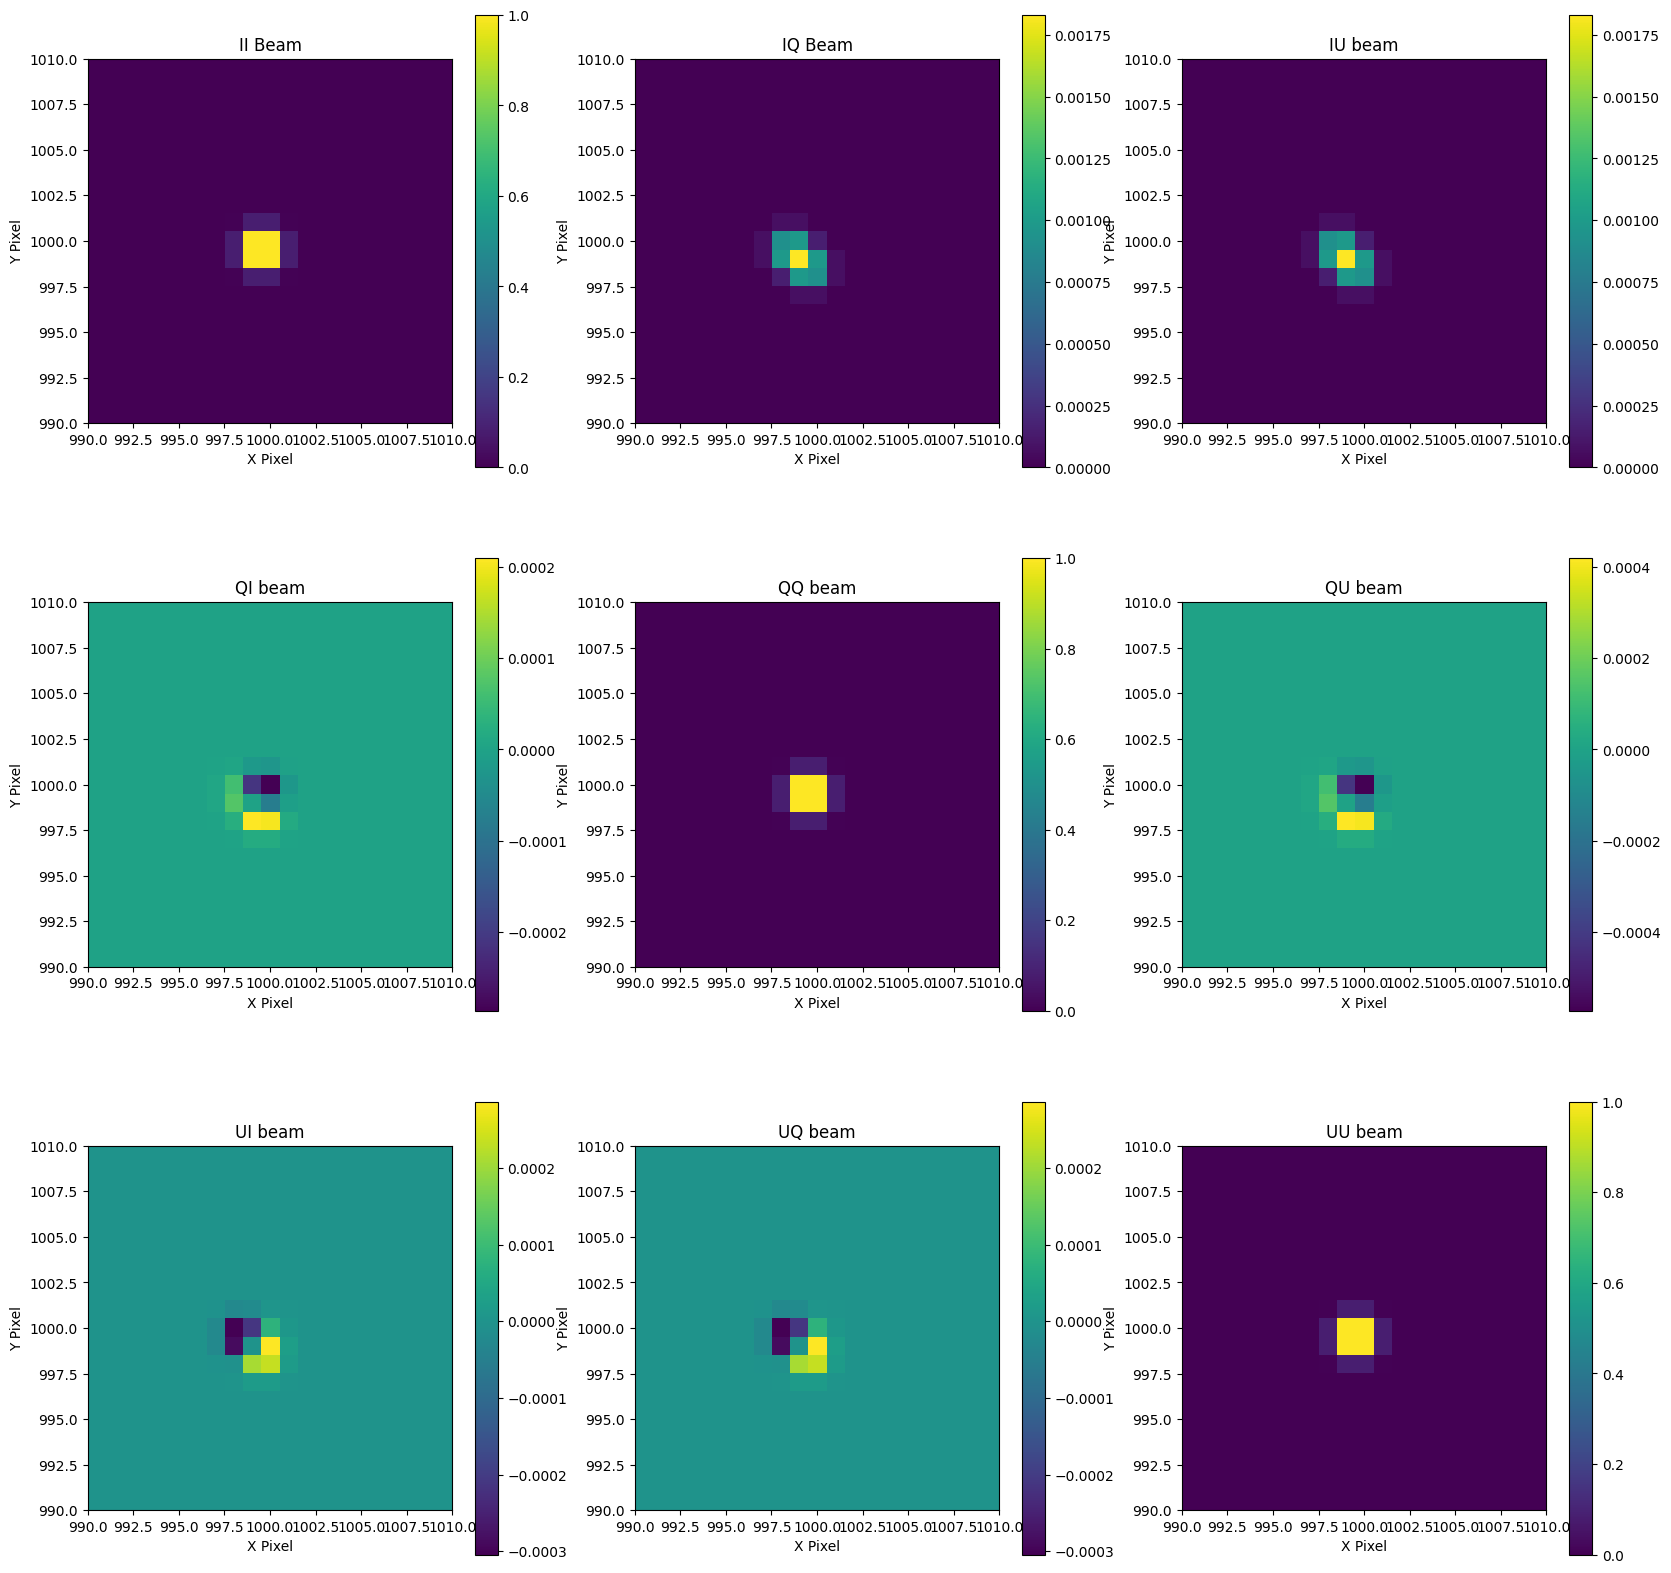

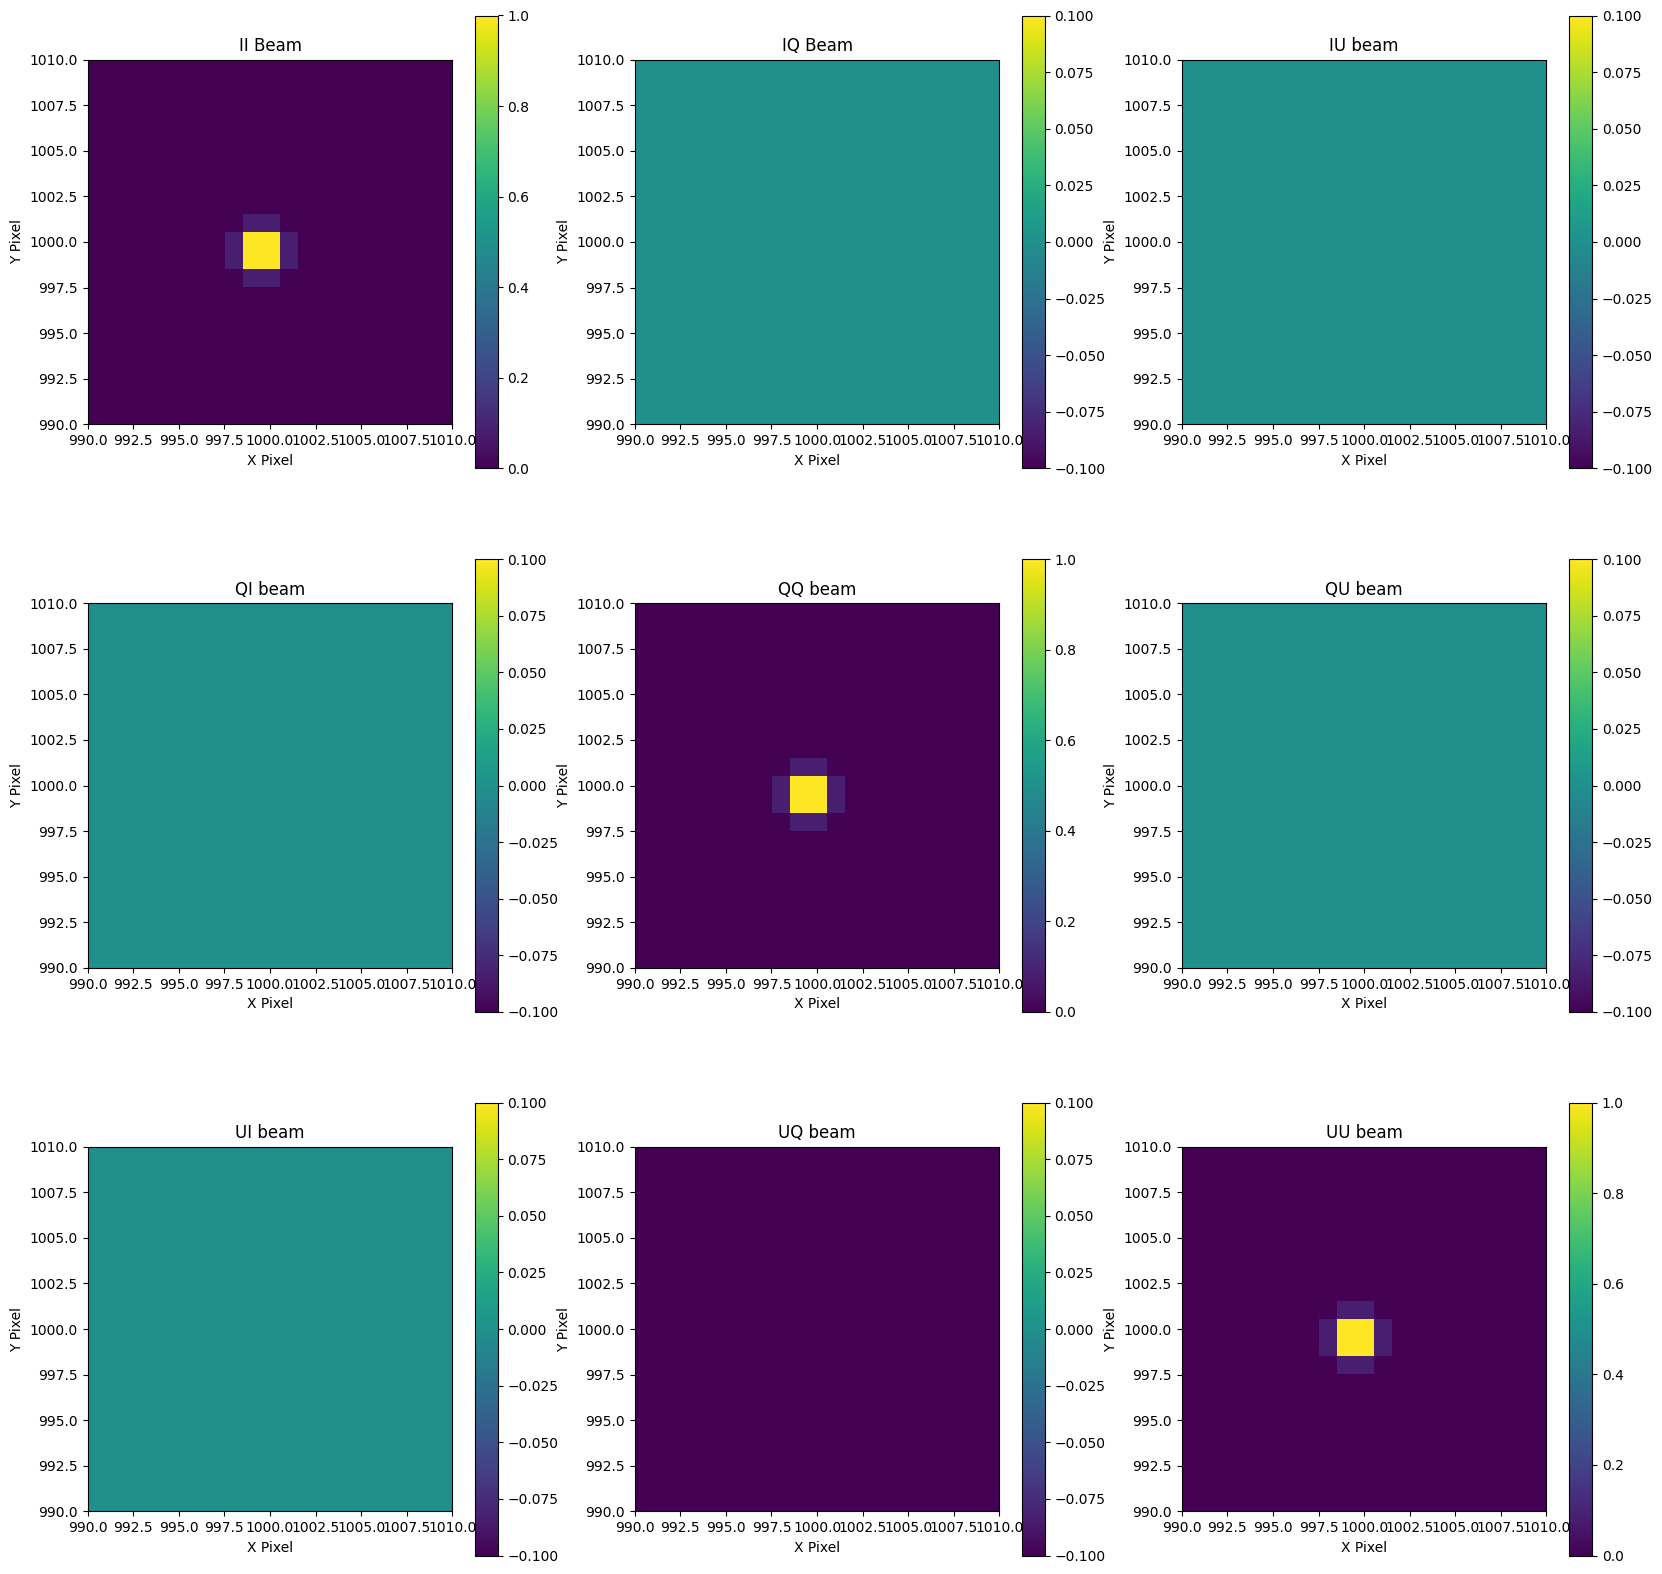

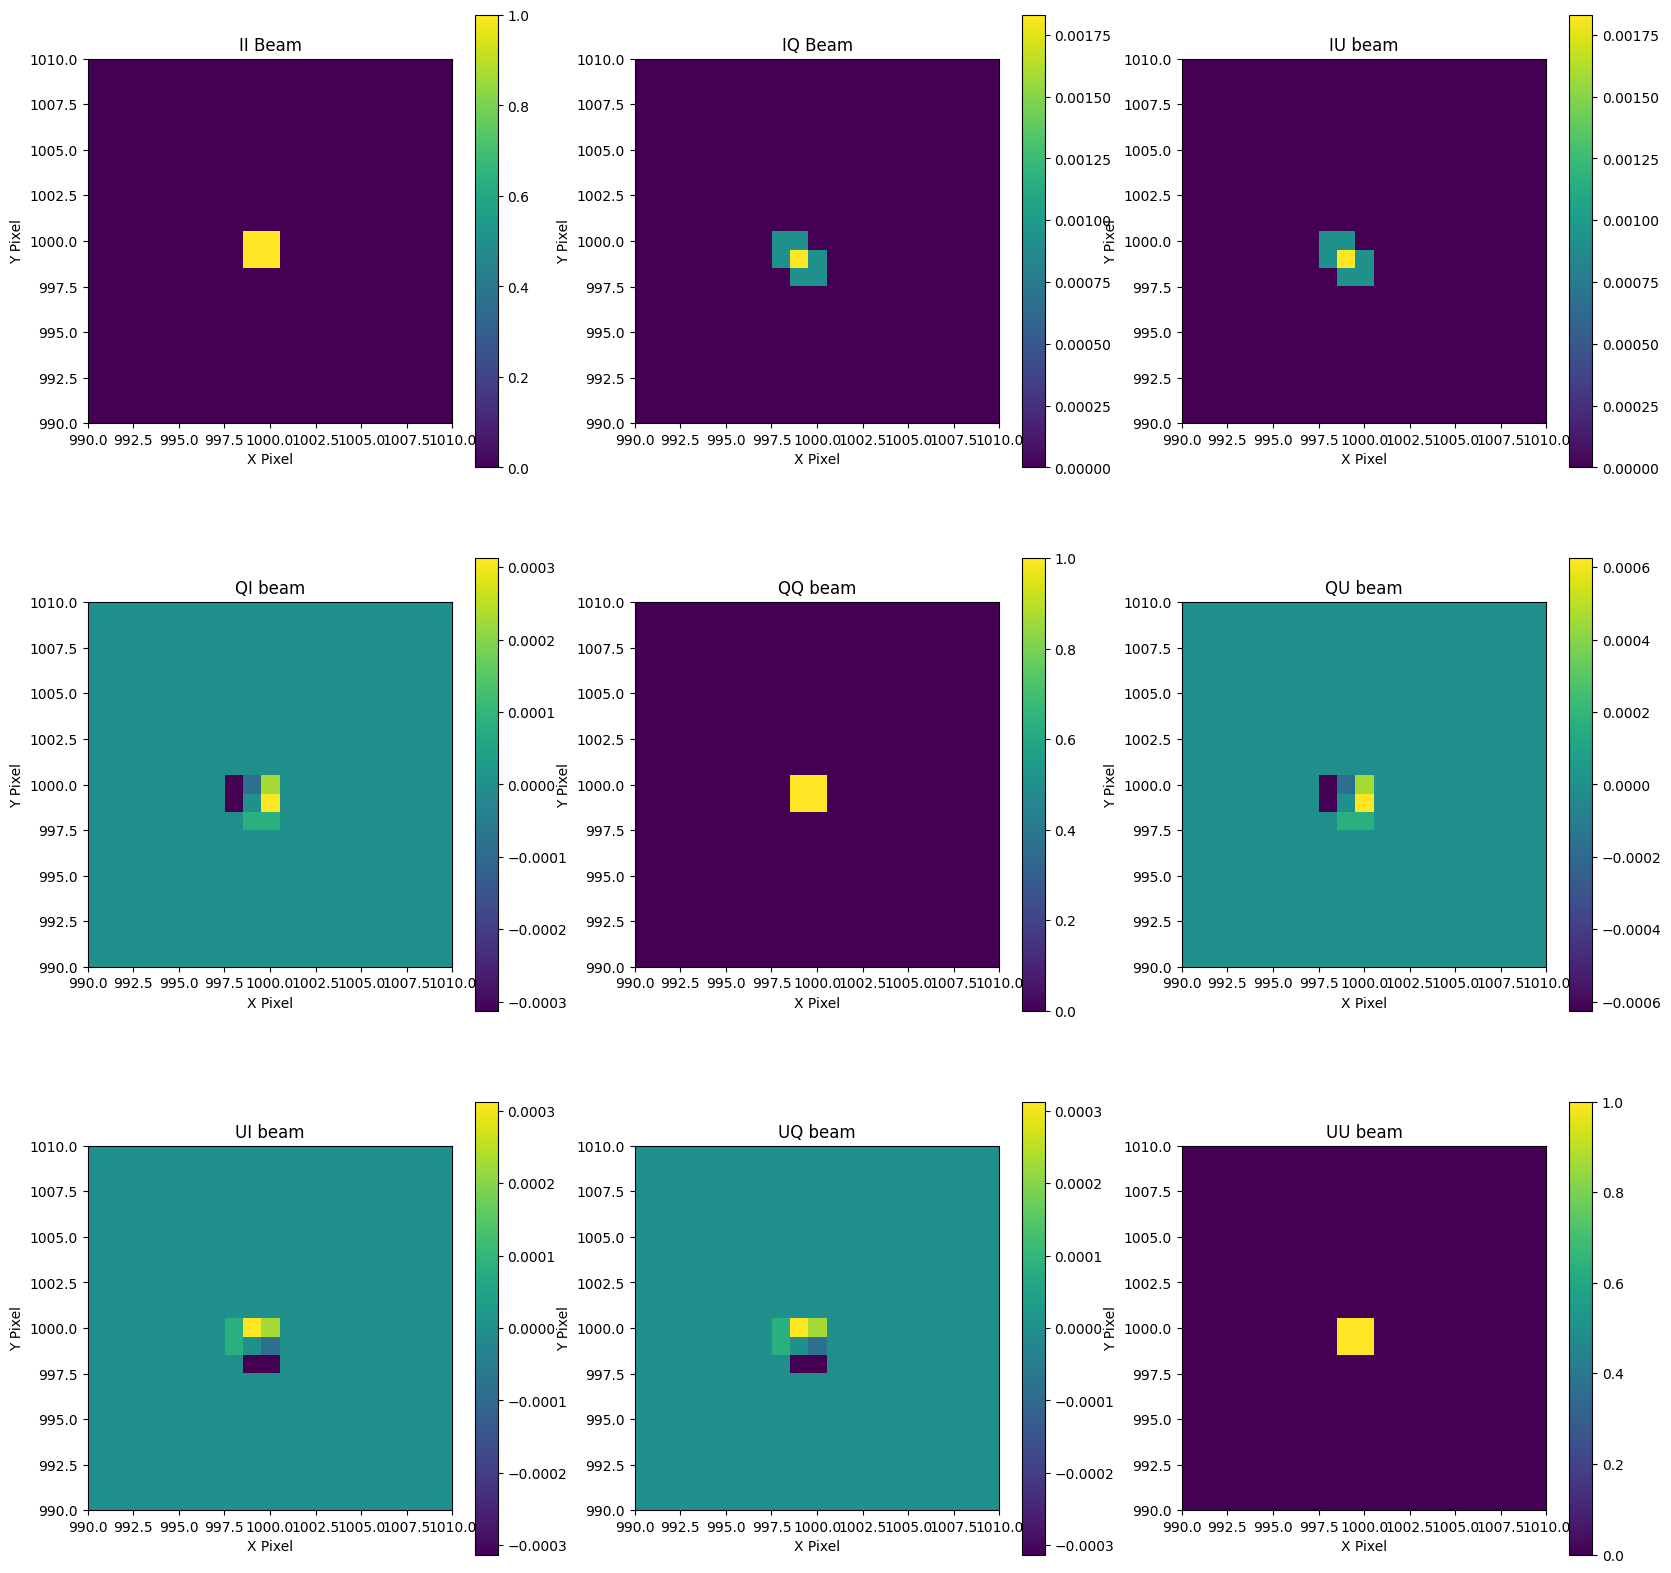

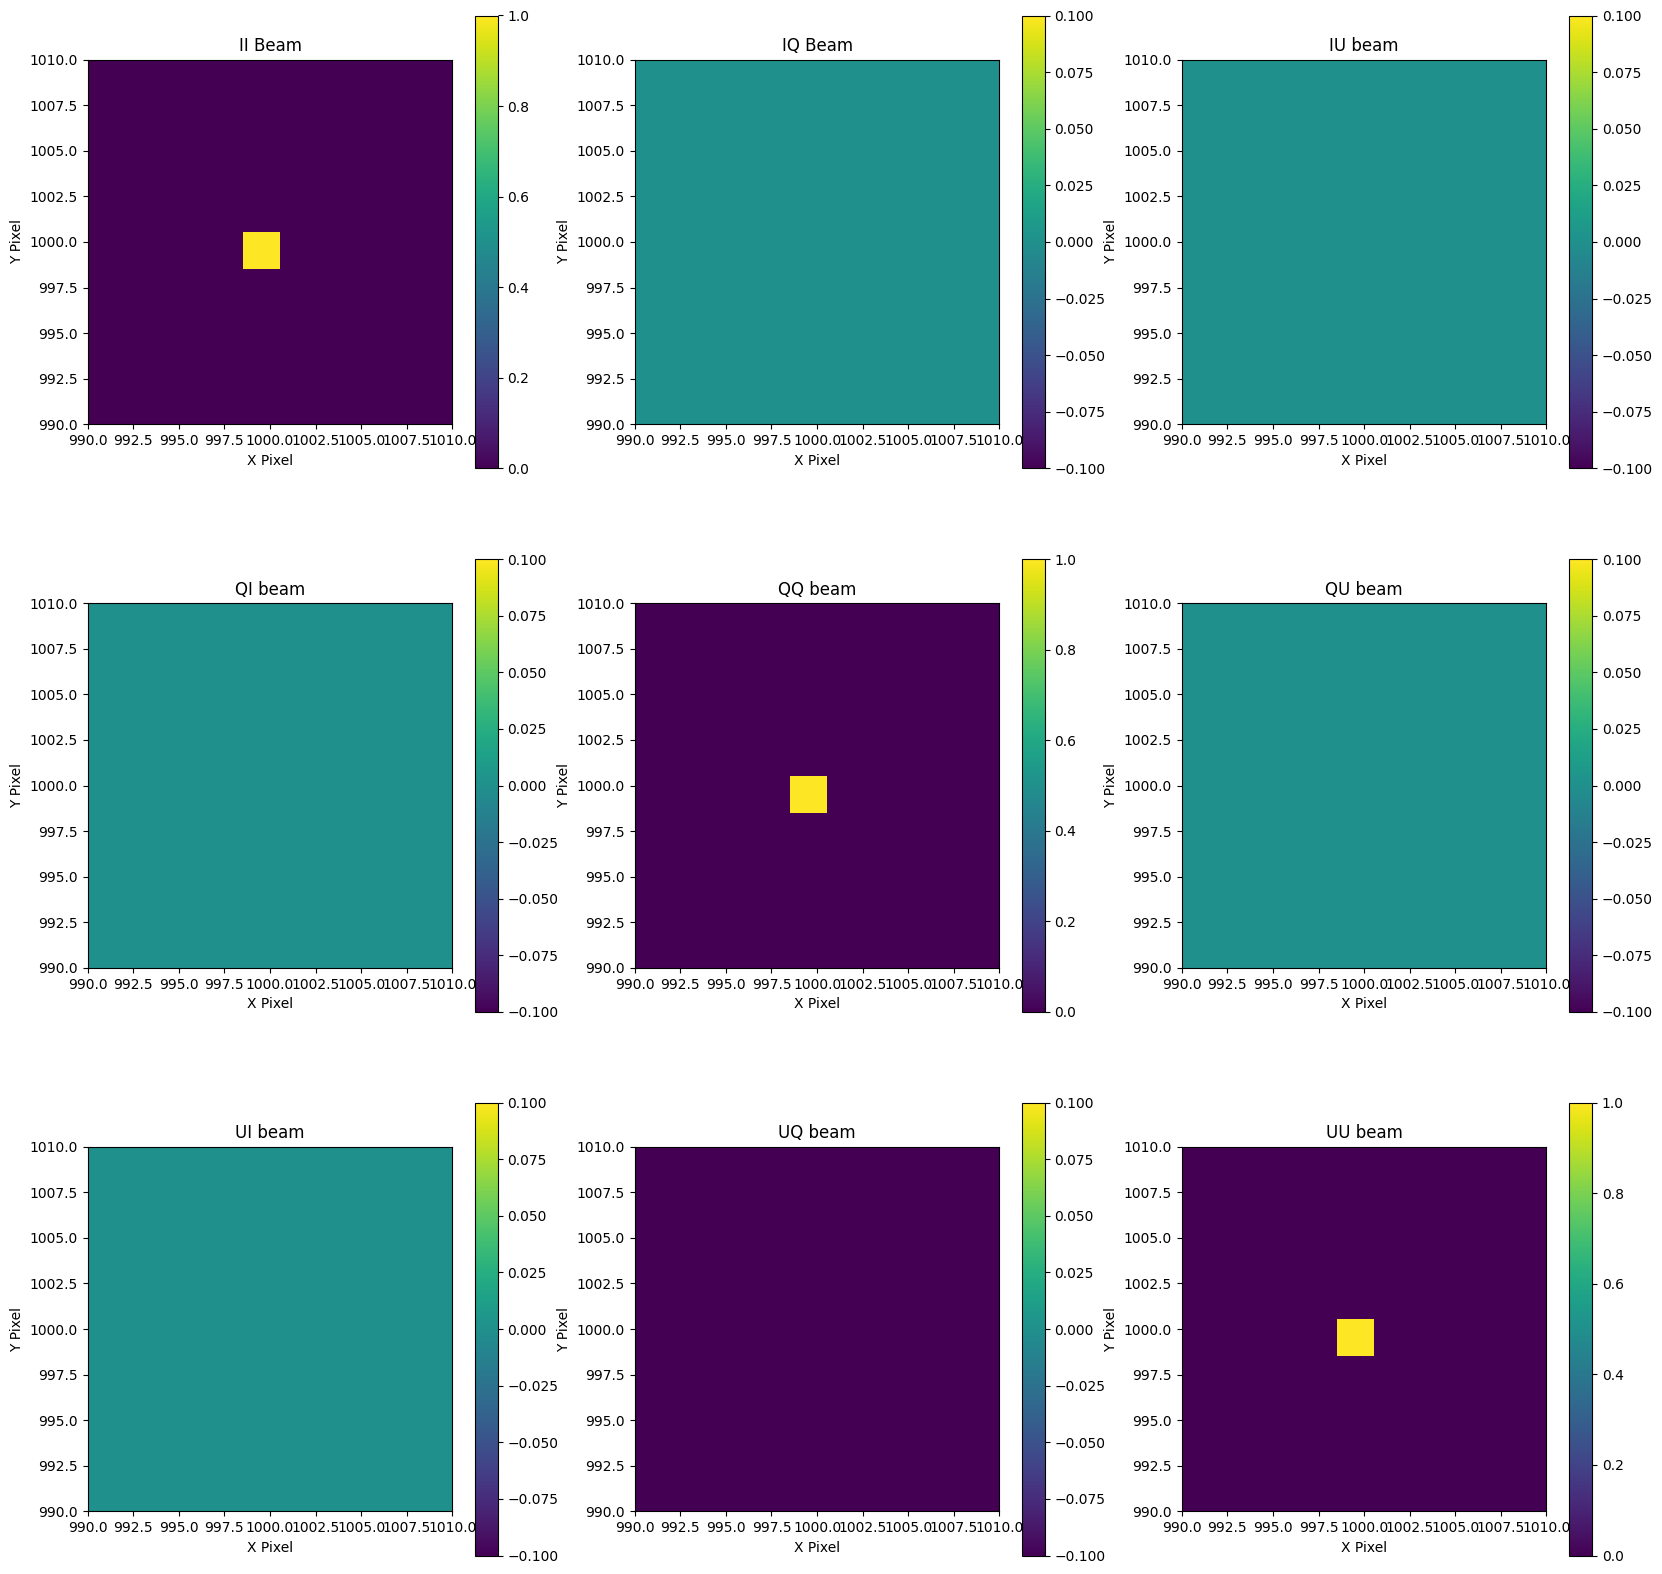

In [12]:
#calculate crosstalk 3x3 IQU beams
convolved_beam_matrix_1 = calculate_crosstalk2(det_dict, coupling_dict, coupling_dict_2, freq1,freq1, pixel_size, perc_corr, N, beam_fwhm_90, delta_ell, ell_max)
convolved_beam_matrix_2 = calculate_crosstalk2(det_dict, coupling_dict, coupling_dict_2, freq1,freq2, pixel_size, perc_corr, N, beam_fwhm_90, delta_ell, ell_max)
convolved_beam_matrix_3 = calculate_crosstalk2(det_dict, coupling_dict, coupling_dict_2, freq2,freq2, pixel_size, perc_corr, N, beam_fwhm_150, delta_ell, ell_max)
convolved_beam_matrix_4 = calculate_crosstalk2(det_dict, coupling_dict, coupling_dict_2, freq2,freq1, pixel_size, perc_corr, N, beam_fwhm_150, delta_ell, ell_max)


In [72]:
#Choose leakage study:
choose_normalization = 'TT'
assert(choose_normalization in [0,'TT','EE','BB'])

#Choose what percentages of T, E, and B you want to use for your leakage study
perc_T = 1.0
perc_E = 0.0
perc_B = 0.0

I, Q, U = make_input_sky(choose_normalization, N, pixel_size, perc_T, perc_E, perc_B)

Imap_1, Qmap_1, Umap_1 = convolve(I, Q, U, convolved_beam_matrix_1)
Imap_2, Qmap_2, Umap_2 = convolve(I, Q, U, convolved_beam_matrix_2)
Imap_3, Qmap_3, Umap_3 = convolve(I, Q, U, convolved_beam_matrix_3)
Imap_4, Qmap_4, Umap_4 = convolve(I, Q, U, convolved_beam_matrix_4)

ell_SPLAT_TT_1, spectra_SPLAT_TT_1 = maps_to_spectra(Imap_1,Qmap_1,Umap_1,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_SPLAT_TT_2, spectra_SPLAT_TT_2 = maps_to_spectra(Imap_2,Qmap_2,Umap_2,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_SPLAT_TT_3, spectra_SPLAT_TT_3 = maps_to_spectra(Imap_3,Qmap_3,Umap_3,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_SPLAT_TT_4, spectra_SPLAT_TT_4 = maps_to_spectra(Imap_4,Qmap_4,Umap_4,delta_ell,ell_max,N,pixel_size,choose_normalization) 

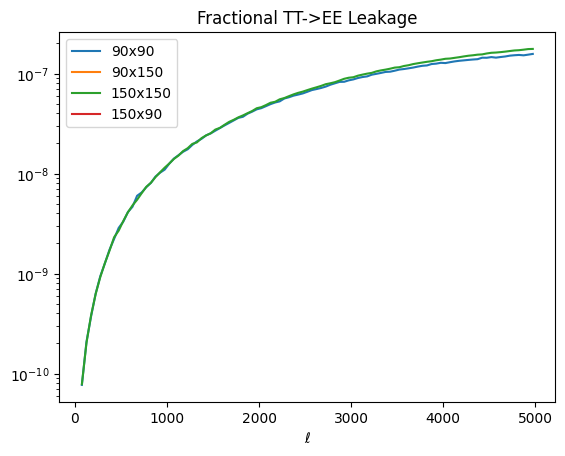

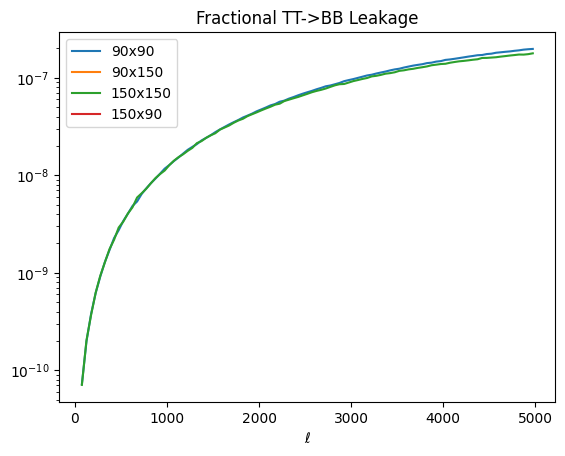

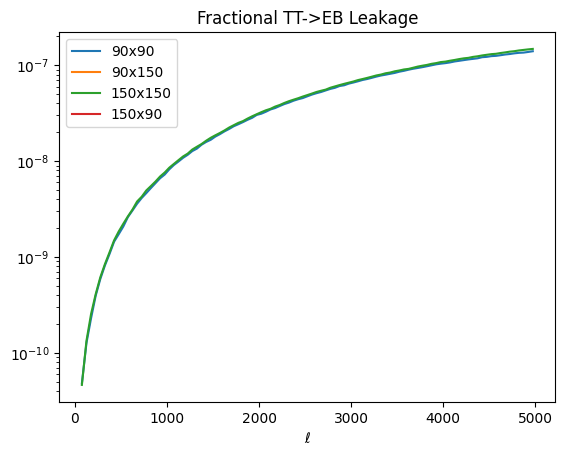

In [73]:
plt.plot(ell_SPLAT_TT_1, spectra_SPLAT_TT_1['EE'], label='90x90')
plt.plot(ell_SPLAT_TT_2, spectra_SPLAT_TT_2['EE'], label='90x150')
plt.plot(ell_SPLAT_TT_3, spectra_SPLAT_TT_3['EE'], label='150x150')
plt.plot(ell_SPLAT_TT_4, spectra_SPLAT_TT_4['EE'], label='150x90')
plt.title('Fractional TT->EE Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

plt.plot(ell_SPLAT_TT_1, spectra_SPLAT_TT_1['BB'], label='90x90')
plt.plot(ell_SPLAT_TT_2, spectra_SPLAT_TT_2['BB'], label='90x150')
plt.plot(ell_SPLAT_TT_3, spectra_SPLAT_TT_3['BB'], label='150x150')
plt.plot(ell_SPLAT_TT_4, spectra_SPLAT_TT_4['BB'], label='150x90')
plt.title('Fractional TT->BB Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

plt.plot(ell_SPLAT_TT_1, spectra_SPLAT_TT_1['EB'], label='90x90')
plt.plot(ell_SPLAT_TT_2, spectra_SPLAT_TT_2['EB'], label='90x150')
plt.plot(ell_SPLAT_TT_3, spectra_SPLAT_TT_3['EB'], label='150x150')
plt.plot(ell_SPLAT_TT_4, spectra_SPLAT_TT_4['EB'], label='150x90')
plt.title('Fractional TT->EB Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

In [74]:
#Choose leakage study:
choose_normalization = 'EE'
assert(choose_normalization in [0,'TT','EE','BB'])

#Choose what percentages of T, E, and B you want to use for your leakage study
perc_T = 0.0
perc_E = 1.0
perc_B = 0.0

I, Q, U = make_input_sky(choose_normalization, N, pixel_size, perc_T, perc_E, perc_B)

Imap_1, Qmap_1, Umap_1 = convolve(I, Q, U, convolved_beam_matrix_1)
Imap_2, Qmap_2, Umap_2 = convolve(I, Q, U, convolved_beam_matrix_2)
Imap_3, Qmap_3, Umap_3 = convolve(I, Q, U, convolved_beam_matrix_3)
Imap_4, Qmap_4, Umap_4 = convolve(I, Q, U, convolved_beam_matrix_4)

ell_SPLAT_EE_1, spectra_SPLAT_EE_1 = maps_to_spectra(Imap_1,Qmap_1,Umap_1,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_SPLAT_EE_2, spectra_SPLAT_EE_2 = maps_to_spectra(Imap_2,Qmap_2,Umap_2,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_SPLAT_EE_3, spectra_SPLAT_EE_3 = maps_to_spectra(Imap_3,Qmap_3,Umap_3,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_SPLAT_EE_4, spectra_SPLAT_EE_4 = maps_to_spectra(Imap_4,Qmap_4,Umap_4,delta_ell,ell_max,N,pixel_size,choose_normalization) 

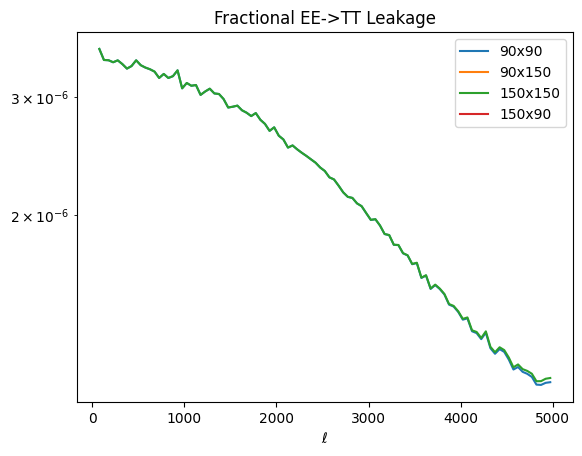

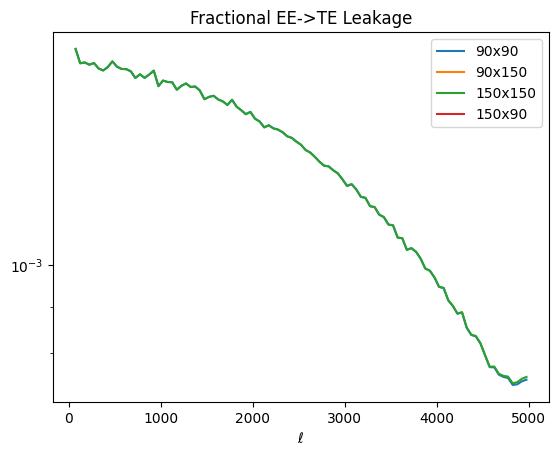

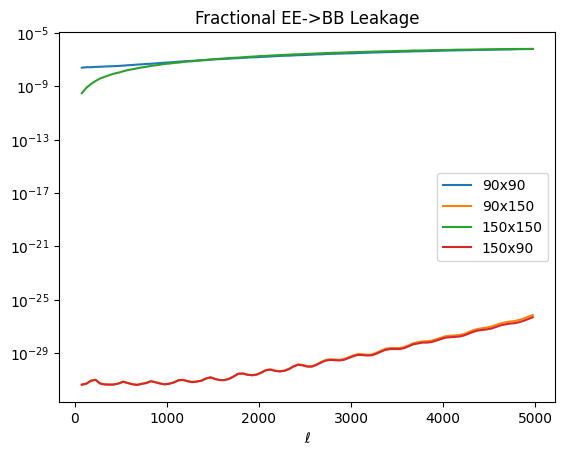

In [75]:
plt.plot(ell_SPLAT_EE_1, spectra_SPLAT_EE_1['TT'], label='90x90')
plt.plot(ell_SPLAT_EE_2, spectra_SPLAT_EE_2['TT'], label='90x150')
plt.plot(ell_SPLAT_EE_3, spectra_SPLAT_EE_3['TT'], label='150x150')
plt.plot(ell_SPLAT_EE_4, spectra_SPLAT_EE_4['TT'], label='150x90')
plt.title('Fractional EE->TT Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

plt.plot(ell_SPLAT_EE_1, spectra_SPLAT_EE_1['TE'], label='90x90')
plt.plot(ell_SPLAT_EE_2, spectra_SPLAT_EE_2['TE'], label='90x150')
plt.plot(ell_SPLAT_EE_3, spectra_SPLAT_EE_3['TE'], label='150x150')
plt.plot(ell_SPLAT_EE_4, spectra_SPLAT_EE_4['TE'], label='150x90')
plt.title('Fractional EE->TE Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

plt.plot(ell_SPLAT_EE_1, spectra_SPLAT_EE_1['BB'], label='90x90')
plt.plot(ell_SPLAT_EE_2, spectra_SPLAT_EE_2['BB'], label='90x150')
plt.plot(ell_SPLAT_EE_3, spectra_SPLAT_EE_3['BB'], label='150x150')
plt.plot(ell_SPLAT_EE_4, spectra_SPLAT_EE_4['BB'], label='150x90')
plt.title('Fractional EE->BB Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

In [76]:
#Choose leakage study:
choose_normalization = 'BB'
assert(choose_normalization in [0,'TT','EE','BB'])

#Choose what percentages of T, E, and B you want to use for your leakage study
perc_T = 0.0
perc_E = 0.0
perc_B = 1.0

I, Q, U = make_input_sky(choose_normalization, N, pixel_size, perc_T, perc_E, perc_B)

Imap_1, Qmap_1, Umap_1 = convolve(I, Q, U, convolved_beam_matrix_1)
Imap_2, Qmap_2, Umap_2 = convolve(I, Q, U, convolved_beam_matrix_2)
Imap_3, Qmap_3, Umap_3 = convolve(I, Q, U, convolved_beam_matrix_3)
Imap_4, Qmap_4, Umap_4 = convolve(I, Q, U, convolved_beam_matrix_4)

ell_SPLAT_BB_1, spectra_SPLAT_BB_1 = maps_to_spectra(Imap_1,Qmap_1,Umap_1,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_SPLAT_BB_2, spectra_SPLAT_BB_2 = maps_to_spectra(Imap_2,Qmap_2,Umap_2,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_SPLAT_BB_3, spectra_SPLAT_BB_3 = maps_to_spectra(Imap_3,Qmap_3,Umap_3,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_SPLAT_BB_4, spectra_SPLAT_BB_4 = maps_to_spectra(Imap_4,Qmap_4,Umap_4,delta_ell,ell_max,N,pixel_size,choose_normalization) 

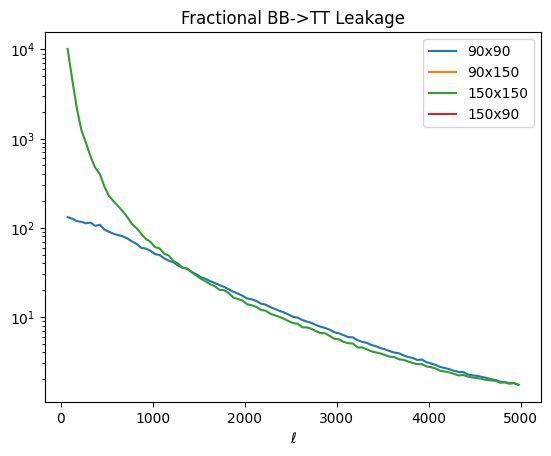

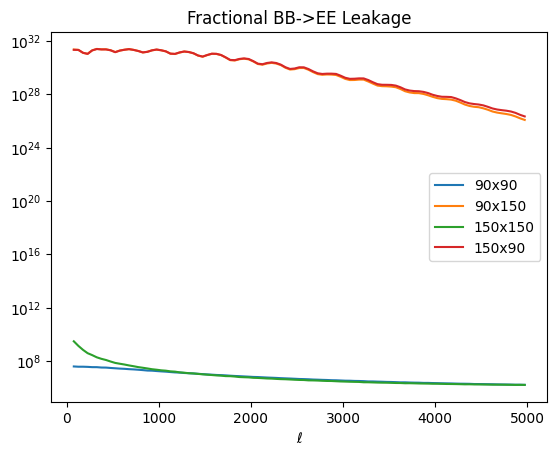

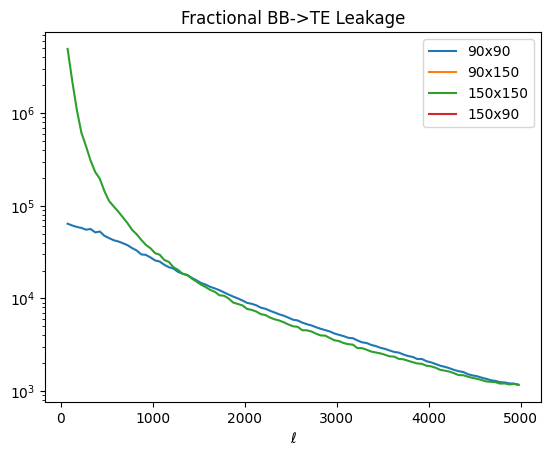

In [62]:
plt.plot(ell_SPLAT_BB_1, spectra_SPLAT_BB_1['TT'], label='90x90')
plt.plot(ell_SPLAT_BB_2, spectra_SPLAT_BB_2['TT'], label='90x150')
plt.plot(ell_SPLAT_BB_3, spectra_SPLAT_BB_3['TT'], label='150x150')
plt.plot(ell_SPLAT_BB_4, spectra_SPLAT_BB_4['TT'], label='150x90')
plt.title('Fractional BB->TT Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

plt.plot(ell_SPLAT_BB_1, spectra_SPLAT_BB_1['EE'], label='90x90')
plt.plot(ell_SPLAT_BB_2, spectra_SPLAT_BB_2['EE'], label='90x150')
plt.plot(ell_SPLAT_BB_3, spectra_SPLAT_BB_3['EE'], label='150x150')
plt.plot(ell_SPLAT_BB_4, spectra_SPLAT_BB_4['EE'], label='150x90')
plt.title('Fractional BB->EE Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

plt.plot(ell_SPLAT_BB_1, spectra_SPLAT_BB_1['TE'], label='90x90')
plt.plot(ell_SPLAT_BB_2, spectra_SPLAT_BB_2['TE'], label='90x150')
plt.plot(ell_SPLAT_BB_3, spectra_SPLAT_BB_3['TE'], label='150x150')
plt.plot(ell_SPLAT_BB_4, spectra_SPLAT_BB_4['TE'], label='150x90')
plt.title('Fractional BB->TE Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

In [34]:
#CMB power spectra for comparison
file_path = '/Users/cesileyking/Desktop/'  #insert your file path here
l = np.loadtxt(file_path+'map_multi_tool-Crosstalk/spectra/total_cls.txt',usecols=(0),dtype=str)
bb = np.loadtxt(file_path+'map_multi_tool-Crosstalk/spectra/total_cls.txt',usecols=(3),dtype=str)
tt = np.loadtxt(file_path+'map_multi_tool-Crosstalk/spectra/total_cls.txt',usecols=(1),dtype=str)
ee = np.loadtxt(file_path+'map_multi_tool-Crosstalk/spectra/total_cls.txt',usecols=(2),dtype=str)
bb_lense = np.loadtxt(file_path+'map_multi_tool-Crosstalk/spectra/lensed_total_cls.txt',usecols=(3),dtype=str)
bb001 = np.loadtxt(file_path+'map_multi_tool-Crosstalk/spectra/total_cls_001.txt',usecols=(3),dtype=str)

ell = []
BB = []
TT = []
EE = []
BB_lense = []

BB001 = []

i = 0
while i<len(bb_lense):
    ell.append(float(l[i]))
    BB.append(float(bb[i]))
    TT.append(float(tt[i]))
    EE.append(float(ee[i]))
    BB_lense.append(float(bb_lense[i]))
    BB001.append(float(bb001[i]))
    i+=1

binned_ell = np.arange(ell_SPLAT_BB_1[0],ell_max,delta_ell)
inds = np.digitize(ell,binned_ell)

binned_BB = []
binned_TT = []
binned_EE = []
binned_BB_lense = []

binned_BB001 = []

i=0
i_bin=0
j=0

while i_bin<98:
    avgBB = 0
    countBB = 0
    avgTT = 0
    countTT = 0
    avgEE = 0
    countEE = 0
    avgBB_lense = 0
    countBB_lense = 0
    avgBB001 = 0
    countBB001 = 0
    i=0
    while i<len(inds):
        if inds[i] == i_bin:
            avgBB+=BB[i]
            countBB+=1
            avgTT+=TT[i]
            countTT+=1
            avgEE+=EE[i]
            countEE+=1
            avgBB_lense+=BB_lense[i]
            countBB_lense+=1
            avgBB001+=BB001[i]
            countBB001+=1
        i+=1

    binned_BB.append(avgBB/countBB)
    binned_TT.append(avgTT/countTT)
    binned_EE.append(avgEE/countEE)
    binned_BB_lense.append(avgBB_lense/countBB_lense)
    binned_BB001.append(avgBB001/countBB001)
    i_bin+=1


binned_BB.append(np.nan)
binned_TT.append(np.nan)
binned_EE.append(np.nan)
binned_BB_lense.append(np.nan)
binned_BB001.append(np.nan)


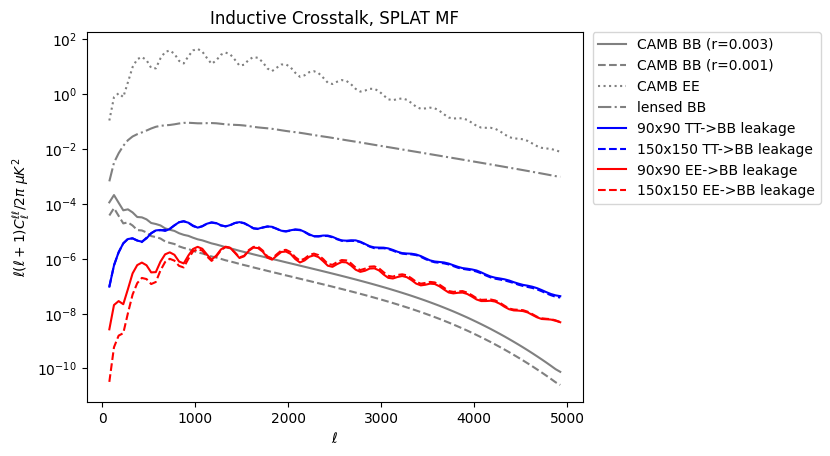

In [95]:
#Order of magnitude compared to CAMB spectra
plt.plot(binned_ell, binned_BB,'-',color='gray',label='CAMB BB (r=0.003)') 
plt.plot(binned_ell, binned_BB001,'--',color='gray',label='CAMB BB (r=0.001)')
plt.plot(binned_ell, binned_EE,':',color='gray',label='CAMB EE')  
plt.plot(binned_ell,binned_BB_lense,'-.',color='gray',label='lensed BB') 

plt.plot(binned_ell, binned_TT*(spectra_SPLAT_TT_1['BB']),'-',color='blue',label='90x90 TT->BB leakage')
plt.plot(binned_ell, binned_TT*(spectra_SPLAT_TT_3['BB']),'--',color='blue',label='150x150 TT->BB leakage')

plt.plot(binned_ell, binned_EE*(spectra_SPLAT_EE_1['BB']),'-',color='red',label='90x90 EE->BB leakage')
plt.plot(binned_ell, binned_EE*(spectra_SPLAT_EE_3['BB']),'--',color='red',label='150x150 EE->BB leakage')


plt.yscale('log')
plt.title('Inductive Crosstalk, SPLAT MF')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)C_\ell^{\ell\ell}/2\pi$ $\mu K^2$')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

# CHLAT MF

In [38]:
pixel_size = 5300. #micro m
f_ratio = 2.00 
aperture = 6.*(10**3) #mm

arcsec_per_pixel = (pixel_size/(f_ratio*aperture))*206.3
deg_per_pixel = arcsec_per_pixel/3600.

#Stuff one must initialize for MMT:

#frequencies represented in position data in GHz
freqs = [90,150]
freq1 = freqs[0]
freq2 = freqs[1]

num_det = 144*4*3    #number of detectors (1 wafer is ~1722 which includes both 90 GHz and 150 GHz detectors)

#Map Parameters:
#rescale the field of view to ~2/3 of a degree spread in detectors on sky
#This rescales the field of view from a SAT packing density to a LAT packing density as is, but can certainly be changed 
rescale = 1 #(2/3) / 12.5 scales positions.txt to LAT FOV

N = 2000    #number of pixels in horizontal and vertical edges of maps
pixel_size = deg_per_pixel    #size of each pixel in deg

#Main beam fwhm in deg
beam_fwhm_90 = 2.1 * 1/60.   #90 GHz
beam_fwhm_150 = 1.3 * 1/60.  #150 GHz

#Correlation Parameters:
perc_corr = 0.003    #percent at which the signals are correlated. 
TtoP_suppress = False #suppress the T->P leakage that results from imbalanced detectors along certain polarization angles

#Power Spectrum Binning Parameters:
delta_ell = 50    #bin width
ell_max = 5000    #maximum ell

#Observation Parameters:
scan_sp = 3 #deg/s scan speed
tau_unc = 0.3 #30% uncertainty


#file path for detector info
path_to_positions = 'CHLAT_MF_wafer.txt'

In [39]:
#generate focal plane distribution
det_dict = generate_focal_plane_distribution(path_to_positions, num_det, freq1, freq2, rescale)

The wafer information has a spread of 0.5787380413009259 degrees in x
The wafer information has a spread of 0.507529336587963 degrees in y


In [40]:
freqs = det_dict.keys()
coupling_dict = {}
for Freq1 in freqs:
    for Freq2 in freqs:
        coupling_dict[(Freq1,Freq2)] = {}
            
        if Freq1==Freq2:
            
            for det in det_dict[Freq1].keys():
                    
                if Freq1==90:
                    if det_dict[Freq1][det]['column']==11:
                        if det_dict[Freq1][det]['row']==11:
                            if det_dict[Freq1][det]['ID'][0]=='B':
                                coupling_dict[(Freq1,Freq2)][det] = 'na'
                                
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==11:
                                        if det_dict[Freq1][det_coupled]['row']==11:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='B':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            if det_dict[Freq1][det]['ID'][0]=='B':
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==0:
                                        if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']+1:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='T':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict[(Freq1,Freq2)][det] = det_coupled
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                        if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='B':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict[(Freq1,Freq2)][det] = det_coupled
                                                
                
                                                
                    else:
                        if det_dict[Freq1][det]['ID'][0]=='B':
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']+1:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='T':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='B':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict[(Freq1,Freq2)][det] = det_coupled
                                            
                                                  
                
                if Freq1==150:
                    if det_dict[Freq1][det]['row']==11:
                        if det_dict[Freq1][det]['column']==11:
                            if det_dict[Freq1][det]['ID'][0]=='R':
                                coupling_dict[(Freq1,Freq2)][det] = 'na'
                                
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==11:
                                        if det_dict[Freq1][det_coupled]['column']==11:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='R':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            if det_dict[Freq1][det]['ID'][0]=='R':
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==0:
                                        if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']+1:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='L':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict[(Freq1,Freq2)][det] = det_coupled
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                        if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='R':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict[(Freq1,Freq2)][det] = det_coupled
                                                
                
                                                
                    else:
                        if det_dict[Freq1][det]['ID'][0]=='R':
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']+1:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='L':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='R':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict[(Freq1,Freq2)][det] = det_coupled
                                                
           
                        
        if Freq1<Freq2:
            for det in det_dict[Freq1].keys():
                coupling_dict[(Freq1,Freq2)][det] = 'na'
                    
        if Freq1>Freq2:
            for det in det_dict[Freq1].keys():
                coupling_dict[(Freq1,Freq2)][det] = 'na'


coupling_dict_2 = {}
for Freq1 in freqs:
    for Freq2 in freqs:
        coupling_dict_2[(Freq1,Freq2)] = {}
            
        if Freq1==Freq2:
            
            for det in det_dict[Freq1].keys():
                    
                if Freq1==90:
                    if det_dict[Freq1][det]['column']==11:
                        if det_dict[Freq1][det]['row']==11:
                            if det_dict[Freq1][det]['ID'][0]=='B':
                                coupling_dict_2[(Freq1,Freq2)][det] = 'na'
                                
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==11:
                                        if det_dict[Freq1][det_coupled]['row']==11:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='B':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            if det_dict[Freq1][det]['ID'][0]=='B':
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==0:
                                        if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']+1:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='T':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                        if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='B':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                                                
                
                                                
                    else:
                        if det_dict[Freq1][det]['ID'][0]=='B':
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']+1:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='T':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='B':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                                            
                                            
                    
                    
                                                                    
                
                if Freq1==150:
                    if det_dict[Freq1][det]['row']==11:
                        if det_dict[Freq1][det]['column']==11:
                            if det_dict[Freq1][det]['ID'][0]=='R':
                                coupling_dict_2[(Freq1,Freq2)][det] = 'na'
                                
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==11:
                                        if det_dict[Freq1][det_coupled]['column']==11:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='R':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            if det_dict[Freq1][det]['ID'][0]=='R':
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==0:
                                        if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']+1:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='L':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                        if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='R':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                                                
                
                                                
                    else:
                        if det_dict[Freq1][det]['ID'][0]=='R':
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']+1:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='L':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='R':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict_2[(Freq1,Freq2)][det] = det_coupled
                                                
         
                        
        if Freq1<Freq2:
            for det in det_dict[Freq1].keys():
                coupling_dict_2[(Freq1,Freq2)][det] = 'na'
                    
        if Freq1>Freq2:
            for det in det_dict[Freq1].keys():
                coupling_dict_2[(Freq1,Freq2)][det] = 'na'


coupling_dict2 = {}
for Freq1 in freqs:
    for Freq2 in freqs:
        coupling_dict2[(Freq1,Freq2)] = {}
            
        if Freq1==Freq2:
            
            
            for det in det_dict[Freq1].keys():
                    
                if Freq1==90:
                    if det_dict[Freq1][det]['column']==0:
                        if det_dict[Freq1][det]['row']==0:
                            if det_dict[Freq1][det]['ID'][0]=='T':
                                coupling_dict2[(Freq1,Freq2)][det] = 'na'
                                
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==0:
                                        if det_dict[Freq1][det_coupled]['row']==0:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='T':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            if det_dict[Freq1][det]['ID'][0]=='T':
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==11:
                                        if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']-1:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='B':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                        if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='T':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                                                
                
                                                
                    else:
                        if det_dict[Freq1][det]['ID'][0]=='T':
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']+1:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='B':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                    if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='T':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                                            
                                                                                              
                
                if Freq1==150:
                    if det_dict[Freq1][det]['row']==0:
                        if det_dict[Freq1][det]['column']==0:
                            if det_dict[Freq1][det]['ID'][0]=='L':
                                coupling_dict2[(Freq1,Freq2)][det] = 'na'
                                #for det_coupled in det_dict[Freq1].keys():
                                 #   if det_dict[Freq1][det_coupled]['row']==0:
                                  #      if det_dict[Freq1][det_coupled]['column']==0:
                                   #         if det_dict[Freq1][det_coupled]['ID'][0]=='L':
                                    #            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                     #               coupling_dict[(Freq1,Freq2)][det] = det_coupled
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==0:
                                        if det_dict[Freq1][det_coupled]['column']==0:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='L':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            if det_dict[Freq1][det]['ID'][0]=='L':
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==11:
                                        if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']-1:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='R':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                            else:
                                for det_coupled in det_dict[Freq1].keys():
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                        if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                            if det_dict[Freq1][det_coupled]['ID'][0]=='L':
                                                if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                    coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                                                
                
                                                
                    else:
                        if det_dict[Freq1][det]['ID'][0]=='L':
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']-1:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='R':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                                                
                        else:
                            for det_coupled in det_dict[Freq1].keys():
                                if det_dict[Freq1][det_coupled]['column']==det_dict[Freq1][det]['column']:
                                    if det_dict[Freq1][det_coupled]['row']==det_dict[Freq1][det]['row']:
                                        if det_dict[Freq1][det_coupled]['ID'][0]=='L':
                                            if det_dict[Freq1][det_coupled]['ID'][-1]==det_dict[Freq1][det]['ID'][-1]:
                                                coupling_dict2[(Freq1,Freq2)][det] = det_coupled
                                                     
                        
        if Freq1<Freq2:
            for det in det_dict[Freq1].keys():
                coupling_dict2[(Freq1,Freq2)][det] = 'na'
                    
        if Freq1>Freq2:
            for det in det_dict[Freq1].keys():
                coupling_dict2[(Freq1,Freq2)][det] = 'na'
            

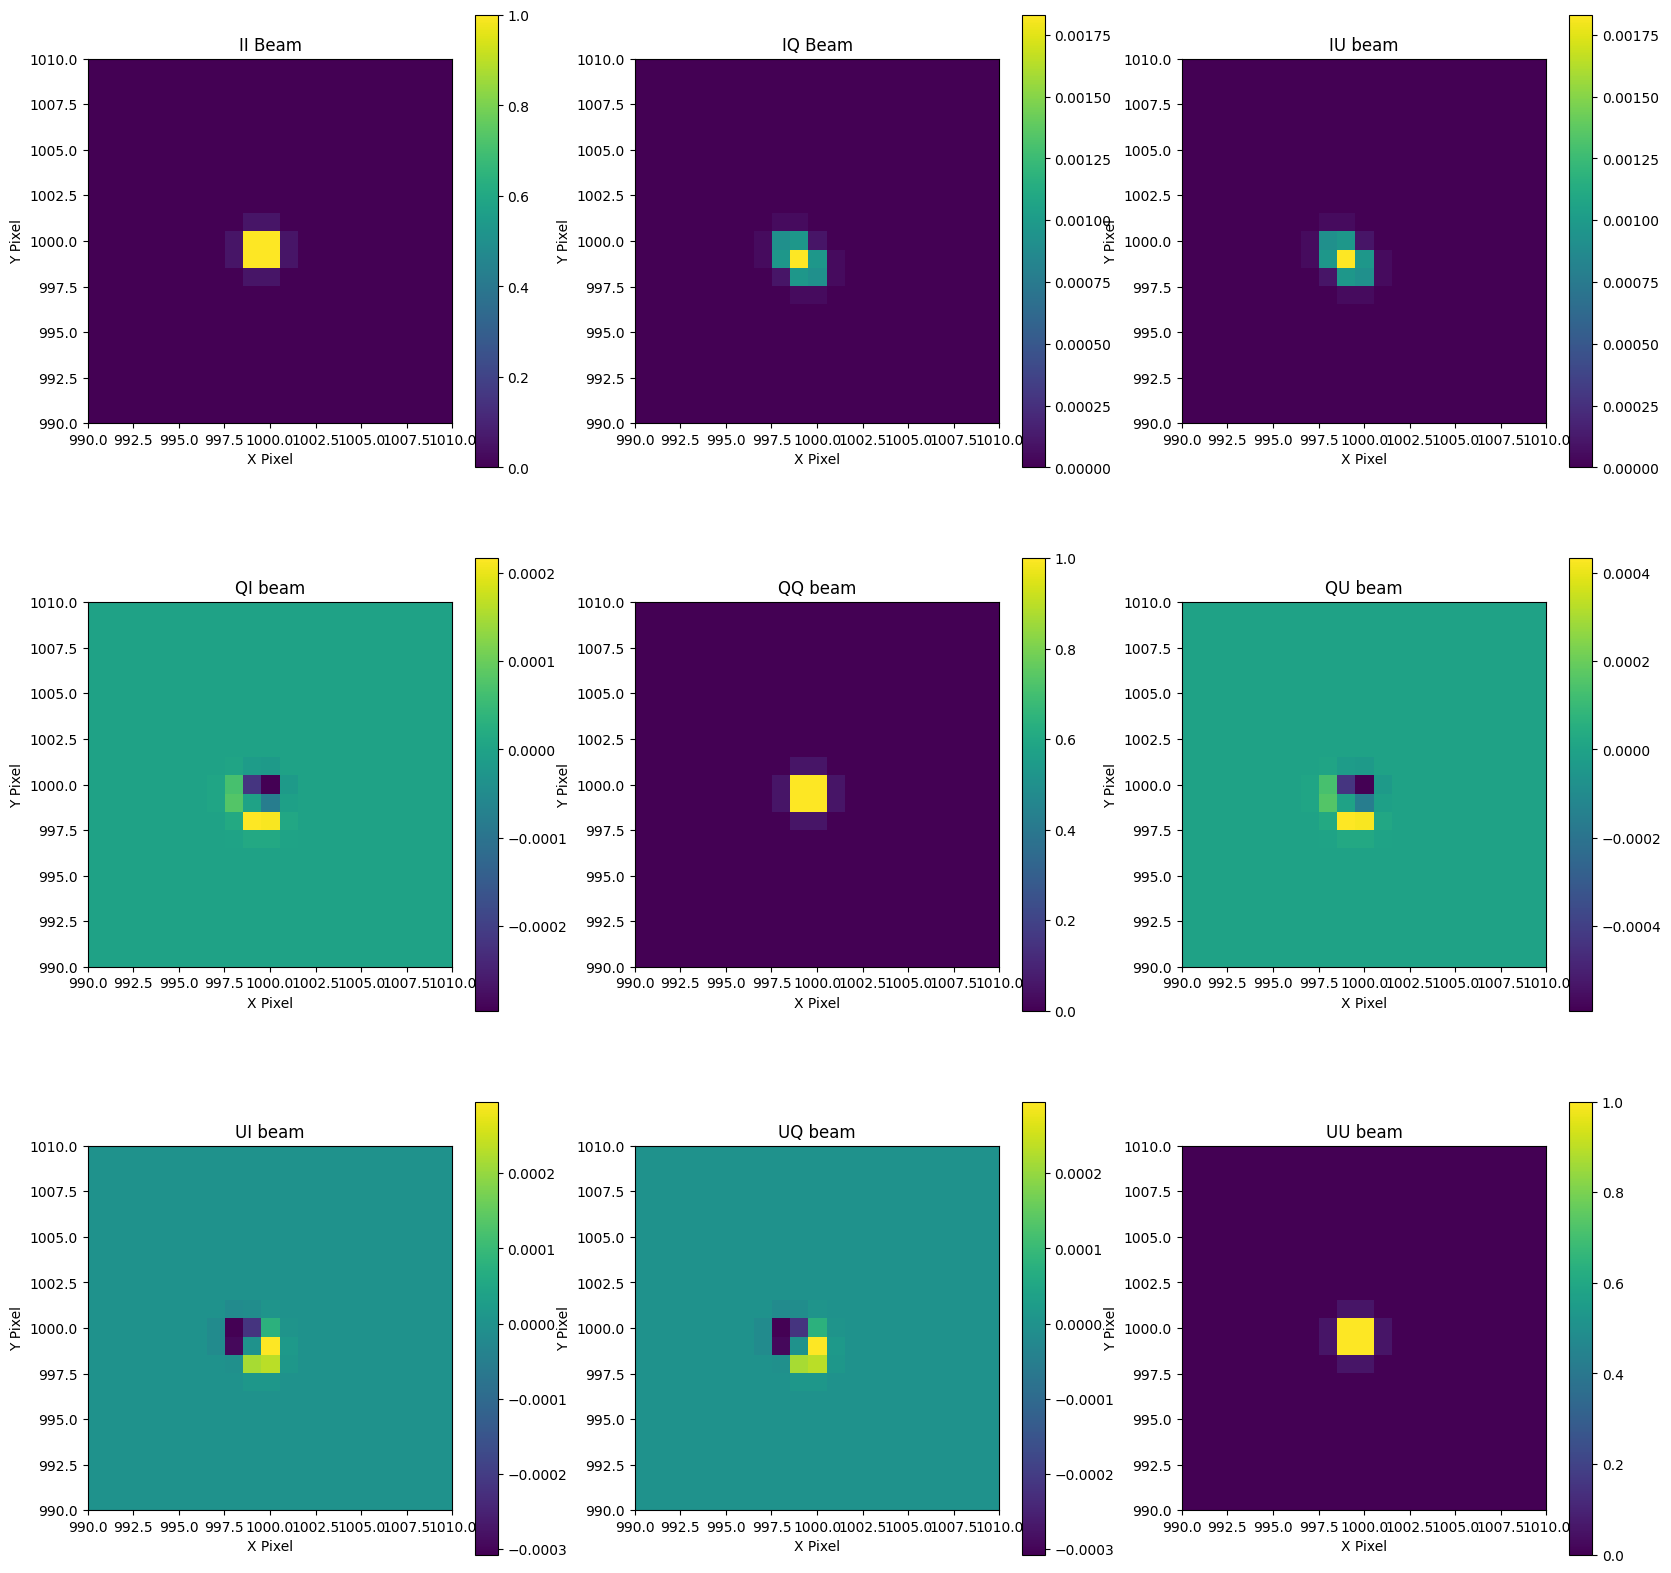

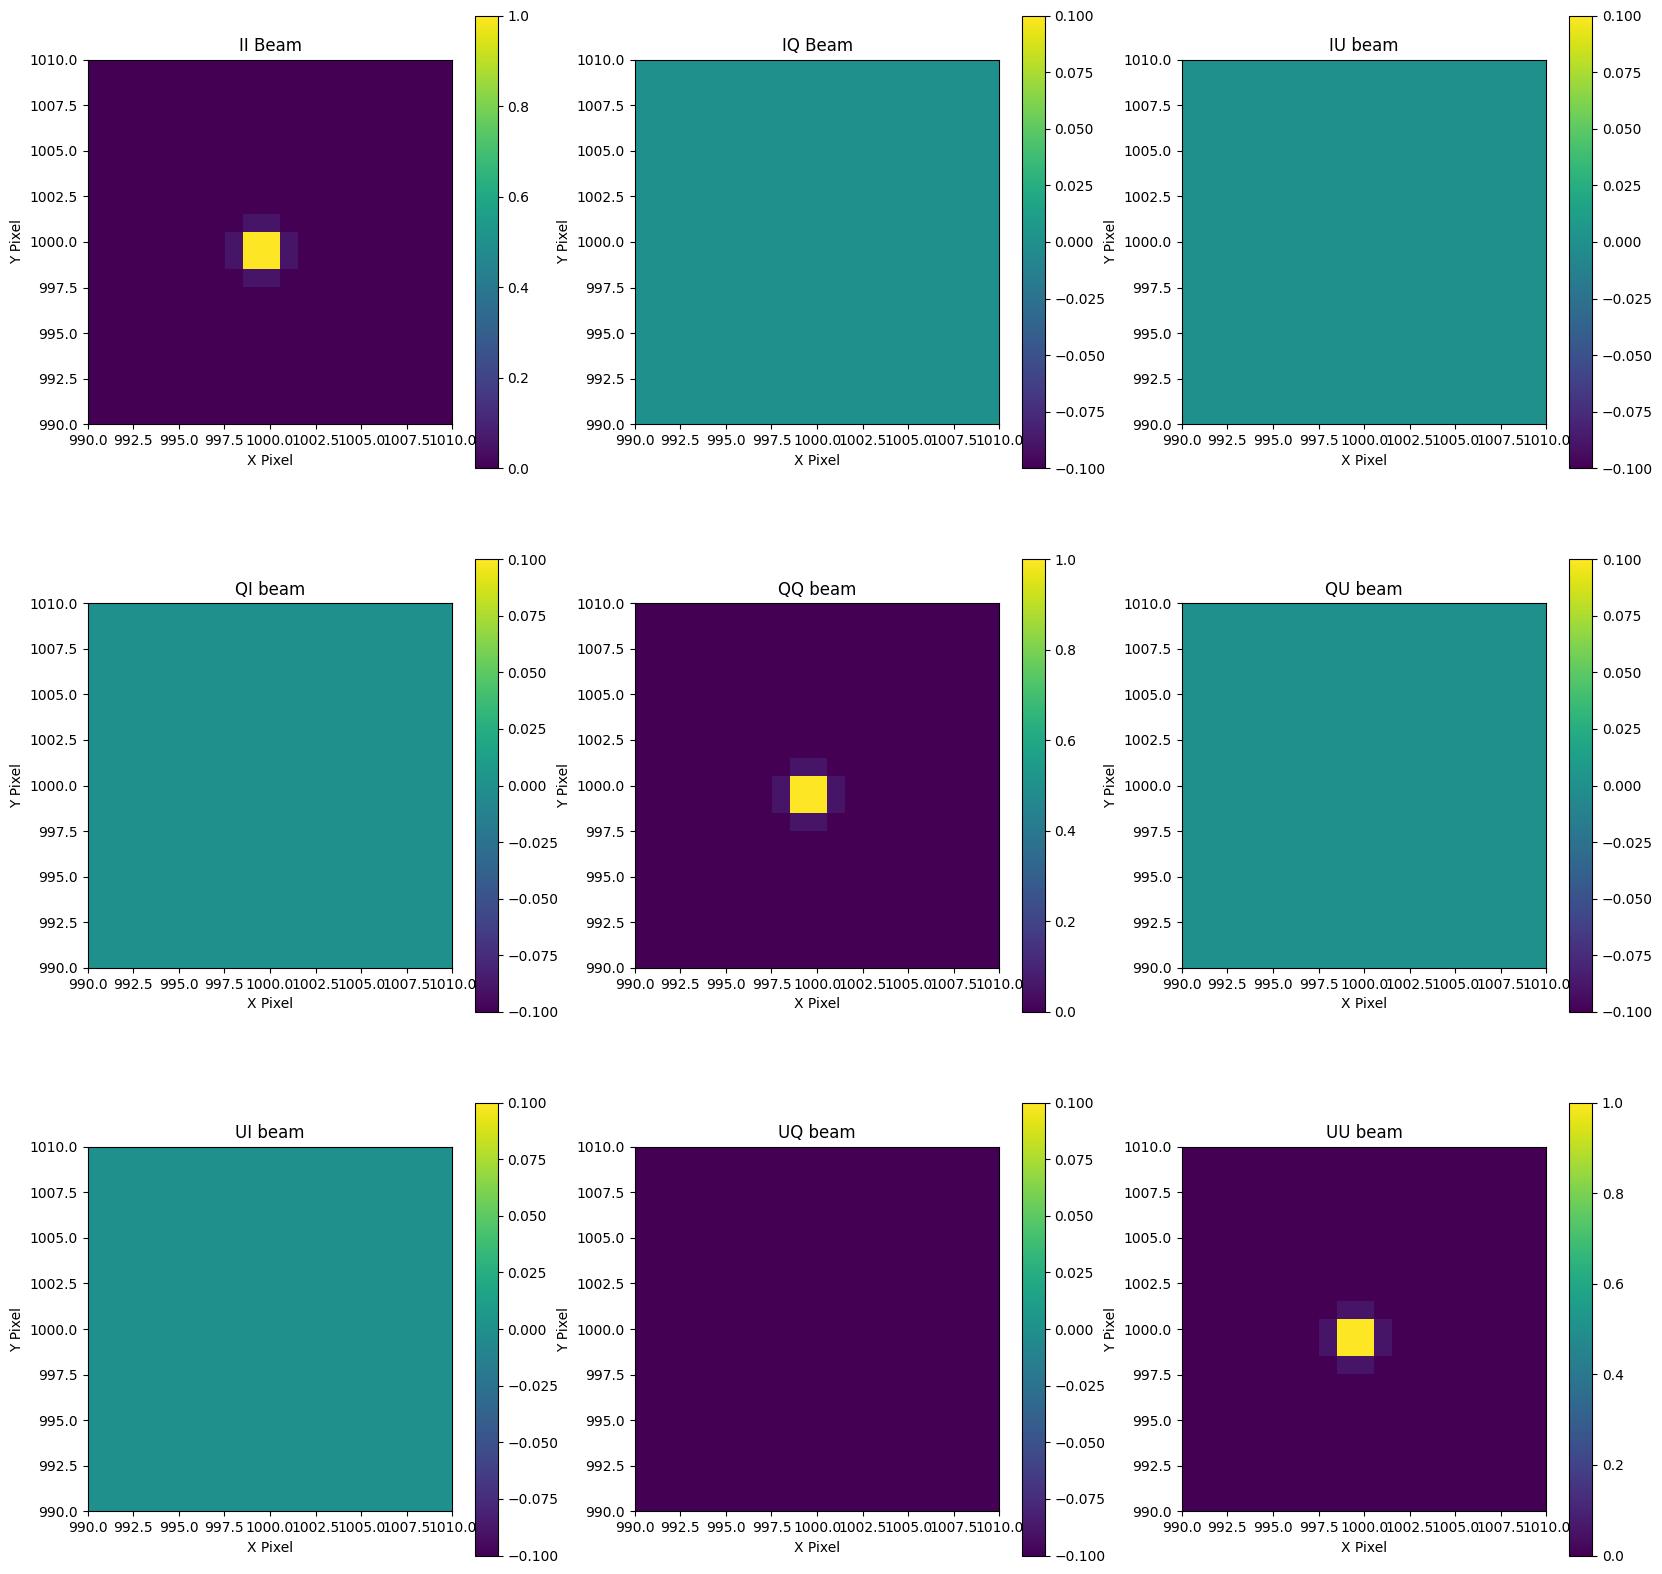

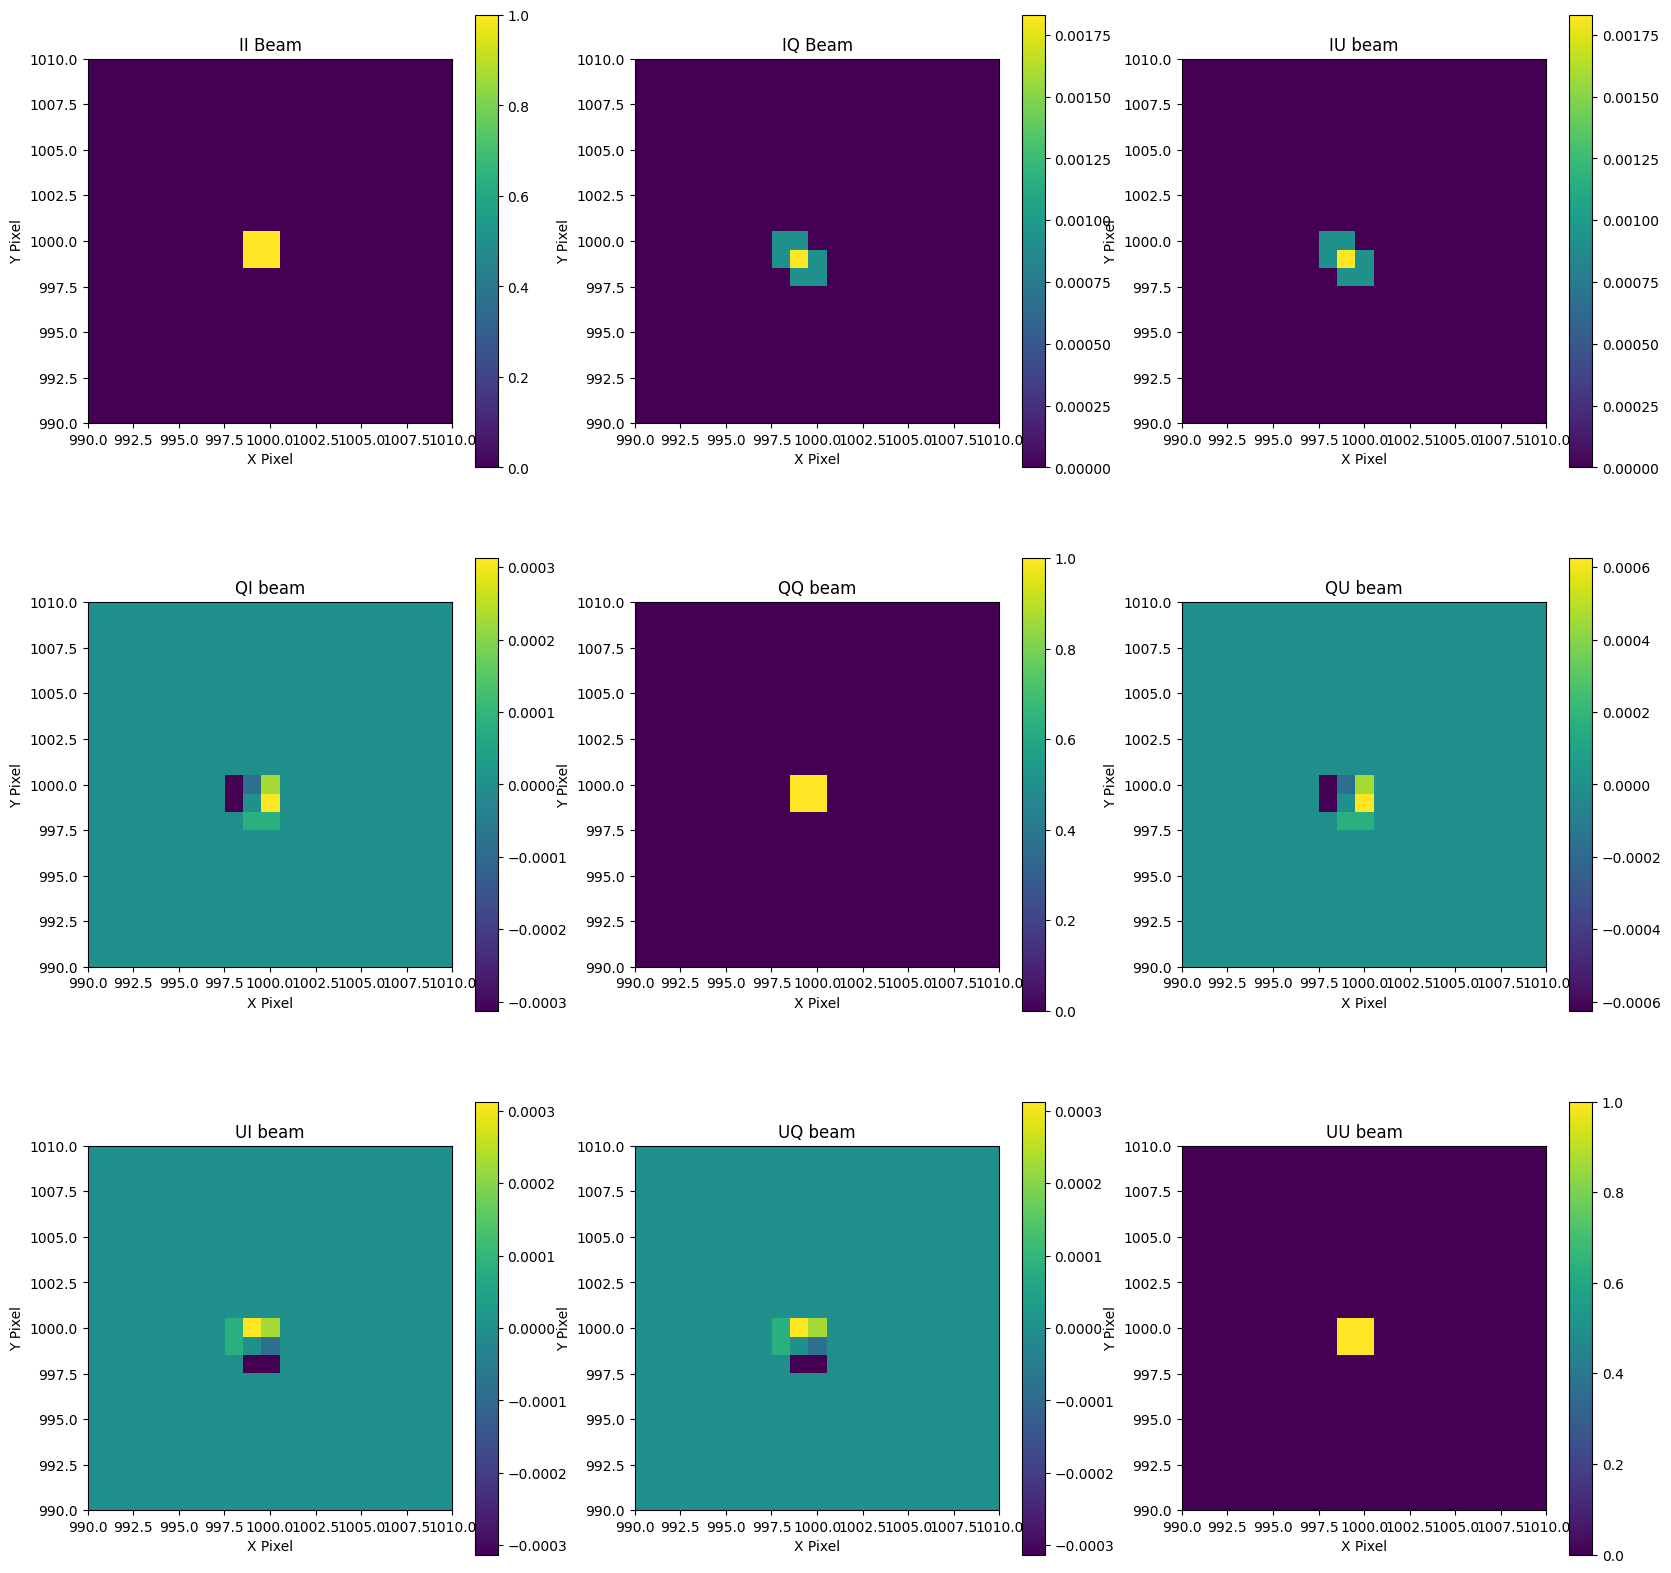

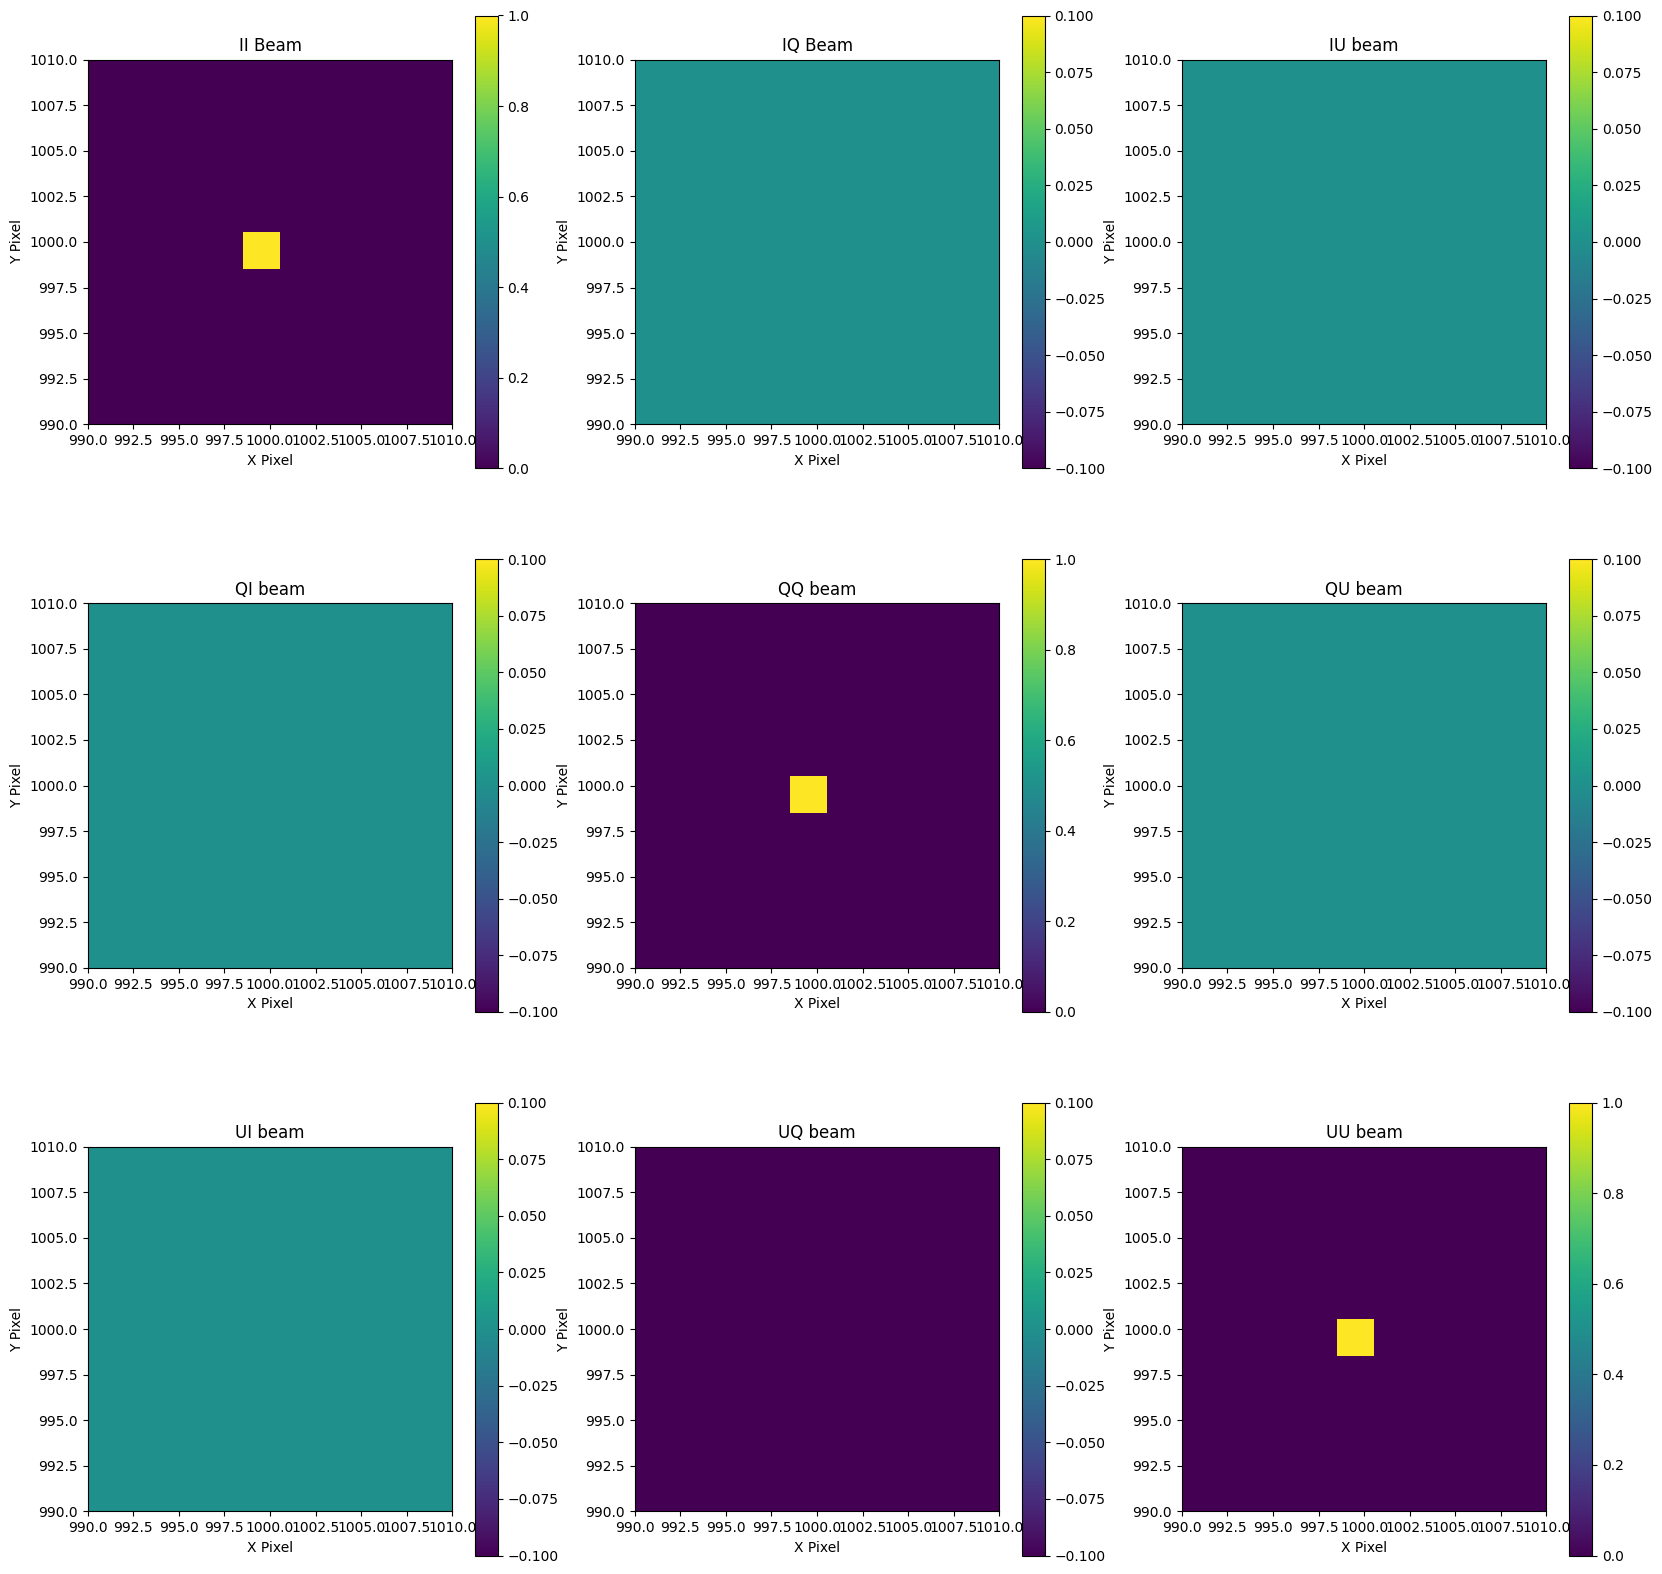

In [41]:
#calculate crosstalk 3x3 IQU beams
convolved_beam_matrix_1 = calculate_crosstalk2(det_dict, coupling_dict, coupling_dict_2, freq1,freq1, pixel_size, perc_corr, N, beam_fwhm_90, delta_ell, ell_max)
convolved_beam_matrix_2 = calculate_crosstalk2(det_dict, coupling_dict, coupling_dict_2, freq1,freq2, pixel_size, perc_corr, N, beam_fwhm_90, delta_ell, ell_max)
convolved_beam_matrix_3 = calculate_crosstalk2(det_dict, coupling_dict, coupling_dict_2, freq2,freq2, pixel_size, perc_corr, N, beam_fwhm_150, delta_ell, ell_max)
convolved_beam_matrix_4 = calculate_crosstalk2(det_dict, coupling_dict, coupling_dict_2, freq2,freq1, pixel_size, perc_corr, N, beam_fwhm_150, delta_ell, ell_max)


In [42]:
#Choose leakage study:
choose_normalization = 'TT'
assert(choose_normalization in [0,'TT','EE','BB'])

#Choose what percentages of T, E, and B you want to use for your leakage study
perc_T = 1.0
perc_E = 0.0
perc_B = 0.0

I, Q, U = make_input_sky(choose_normalization, N, pixel_size, perc_T, perc_E, perc_B)

Imap_1, Qmap_1, Umap_1 = convolve(I, Q, U, convolved_beam_matrix_1)
Imap_2, Qmap_2, Umap_2 = convolve(I, Q, U, convolved_beam_matrix_2)
Imap_3, Qmap_3, Umap_3 = convolve(I, Q, U, convolved_beam_matrix_3)
Imap_4, Qmap_4, Umap_4 = convolve(I, Q, U, convolved_beam_matrix_4)

ell_CHLAT_TT_1, spectra_CHLAT_TT_1 = maps_to_spectra(Imap_1,Qmap_1,Umap_1,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_CHLAT_TT_2, spectra_CHLAT_TT_2 = maps_to_spectra(Imap_2,Qmap_2,Umap_2,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_CHLAT_TT_3, spectra_CHLAT_TT_3 = maps_to_spectra(Imap_3,Qmap_3,Umap_3,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_CHLAT_TT_4, spectra_CHLAT_TT_4 = maps_to_spectra(Imap_4,Qmap_4,Umap_4,delta_ell,ell_max,N,pixel_size,choose_normalization) 

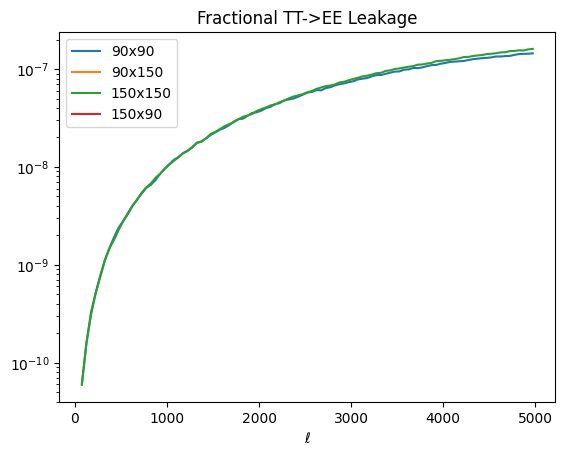

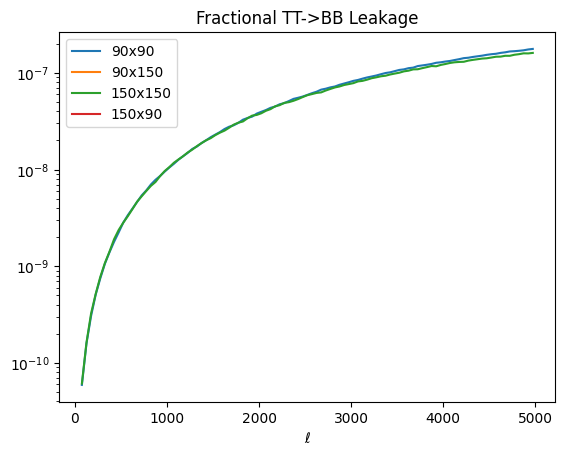

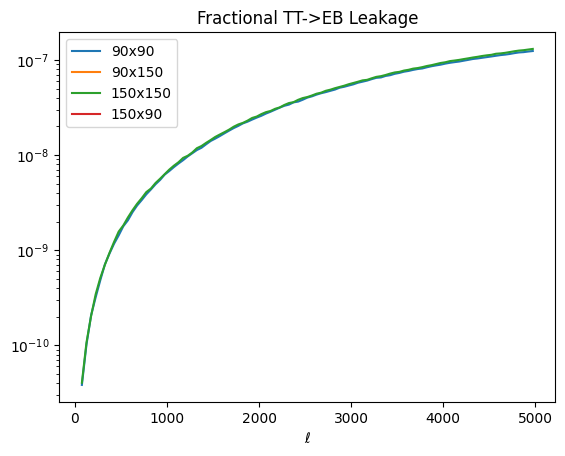

In [43]:
plt.plot(ell_CHLAT_TT_1, spectra_CHLAT_TT_1['EE'], label='90x90')
plt.plot(ell_CHLAT_TT_2, spectra_CHLAT_TT_2['EE'], label='90x150')
plt.plot(ell_CHLAT_TT_3, spectra_CHLAT_TT_3['EE'], label='150x150')
plt.plot(ell_CHLAT_TT_4, spectra_CHLAT_TT_4['EE'], label='150x90')
plt.title('Fractional TT->EE Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

plt.plot(ell_CHLAT_TT_1, spectra_CHLAT_TT_1['BB'], label='90x90')
plt.plot(ell_CHLAT_TT_2, spectra_CHLAT_TT_2['BB'], label='90x150')
plt.plot(ell_CHLAT_TT_3, spectra_CHLAT_TT_3['BB'], label='150x150')
plt.plot(ell_CHLAT_TT_4, spectra_CHLAT_TT_4['BB'], label='150x90')
plt.title('Fractional TT->BB Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

plt.plot(ell_CHLAT_TT_1, spectra_CHLAT_TT_1['EB'], label='90x90')
plt.plot(ell_CHLAT_TT_2, spectra_CHLAT_TT_2['EB'], label='90x150')
plt.plot(ell_CHLAT_TT_3, spectra_CHLAT_TT_3['EB'], label='150x150')
plt.plot(ell_CHLAT_TT_4, spectra_CHLAT_TT_4['EB'], label='150x90')
plt.title('Fractional TT->EB Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

In [44]:
#Choose leakage study:
choose_normalization = 'EE'
assert(choose_normalization in [0,'TT','EE','BB'])

#Choose what percentages of T, E, and B you want to use for your leakage study
perc_T = 0.0
perc_E = 1.0
perc_B = 0.0

I, Q, U = make_input_sky(choose_normalization, N, pixel_size, perc_T, perc_E, perc_B)

Imap_1, Qmap_1, Umap_1 = convolve(I, Q, U, convolved_beam_matrix_1)
Imap_2, Qmap_2, Umap_2 = convolve(I, Q, U, convolved_beam_matrix_2)
Imap_3, Qmap_3, Umap_3 = convolve(I, Q, U, convolved_beam_matrix_3)
Imap_4, Qmap_4, Umap_4 = convolve(I, Q, U, convolved_beam_matrix_4)

ell_CHLAT_EE_1, spectra_CHLAT_EE_1 = maps_to_spectra(Imap_1,Qmap_1,Umap_1,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_CHLAT_EE_2, spectra_CHLAT_EE_2 = maps_to_spectra(Imap_2,Qmap_2,Umap_2,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_CHLAT_EE_3, spectra_CHLAT_EE_3 = maps_to_spectra(Imap_3,Qmap_3,Umap_3,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_CHLAT_EE_4, spectra_CHLAT_EE_4 = maps_to_spectra(Imap_4,Qmap_4,Umap_4,delta_ell,ell_max,N,pixel_size,choose_normalization) 

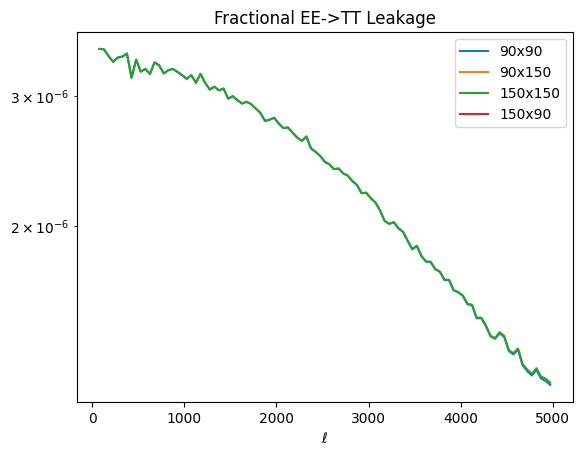

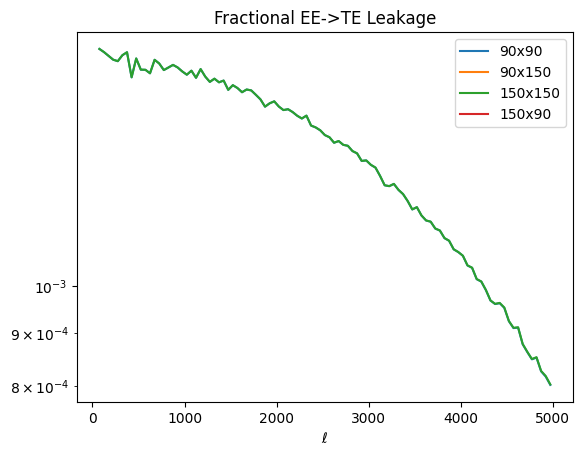

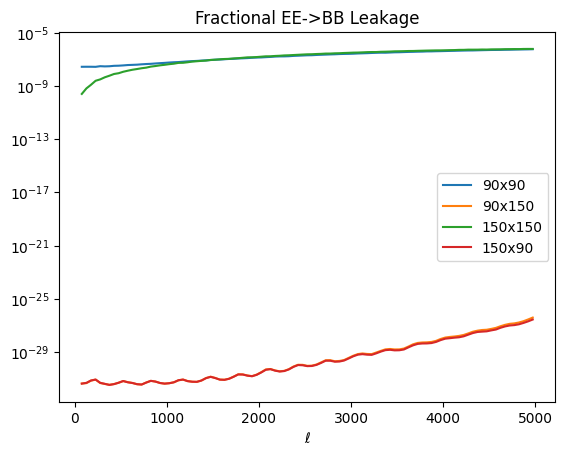

In [45]:
plt.plot(ell_CHLAT_EE_1, spectra_CHLAT_EE_1['TT'], label='90x90')
plt.plot(ell_CHLAT_EE_2, spectra_CHLAT_EE_2['TT'], label='90x150')
plt.plot(ell_CHLAT_EE_3, spectra_CHLAT_EE_3['TT'], label='150x150')
plt.plot(ell_CHLAT_EE_4, spectra_CHLAT_EE_4['TT'], label='150x90')
plt.title('Fractional EE->TT Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

plt.plot(ell_CHLAT_EE_1, spectra_CHLAT_EE_1['TE'], label='90x90')
plt.plot(ell_CHLAT_EE_2, spectra_CHLAT_EE_2['TE'], label='90x150')
plt.plot(ell_CHLAT_EE_3, spectra_CHLAT_EE_3['TE'], label='150x150')
plt.plot(ell_CHLAT_EE_4, spectra_CHLAT_EE_4['TE'], label='150x90')
plt.title('Fractional EE->TE Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

plt.plot(ell_CHLAT_EE_1, spectra_CHLAT_EE_1['BB'], label='90x90')
plt.plot(ell_CHLAT_EE_2, spectra_CHLAT_EE_2['BB'], label='90x150')
plt.plot(ell_CHLAT_EE_3, spectra_CHLAT_EE_3['BB'], label='150x150')
plt.plot(ell_CHLAT_EE_4, spectra_CHLAT_EE_4['BB'], label='150x90')
plt.title('Fractional EE->BB Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

In [46]:
#Choose leakage study:
choose_normalization = 'BB'
assert(choose_normalization in [0,'TT','EE','BB'])

#Choose what percentages of T, E, and B you want to use for your leakage study
perc_T = 0.0
perc_E = 1.0
perc_B = 0.0

I, Q, U = make_input_sky(choose_normalization, N, pixel_size, perc_T, perc_E, perc_B)

Imap_1, Qmap_1, Umap_1 = convolve(I, Q, U, convolved_beam_matrix_1)
Imap_2, Qmap_2, Umap_2 = convolve(I, Q, U, convolved_beam_matrix_2)
Imap_3, Qmap_3, Umap_3 = convolve(I, Q, U, convolved_beam_matrix_3)
Imap_4, Qmap_4, Umap_4 = convolve(I, Q, U, convolved_beam_matrix_4)

ell_CHLAT_BB_1, spectra_CHLAT_BB_1 = maps_to_spectra(Imap_1,Qmap_1,Umap_1,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_CHLAT_BB_2, spectra_CHLAT_BB_2 = maps_to_spectra(Imap_2,Qmap_2,Umap_2,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_CHLAT_BB_3, spectra_CHLAT_BB_3 = maps_to_spectra(Imap_3,Qmap_3,Umap_3,delta_ell,ell_max,N,pixel_size,choose_normalization)
ell_CHLAT_BB_4, spectra_CHLAT_BB_4 = maps_to_spectra(Imap_4,Qmap_4,Umap_4,delta_ell,ell_max,N,pixel_size,choose_normalization) 

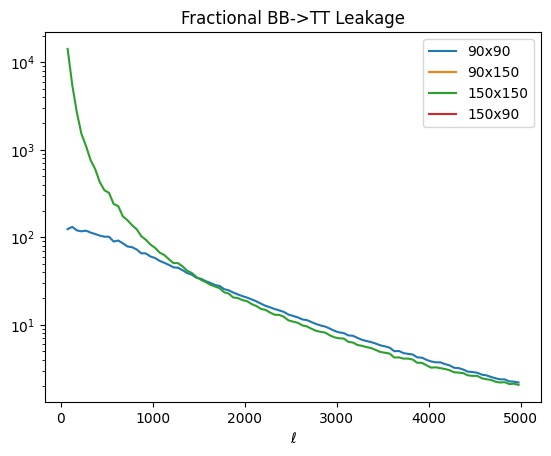

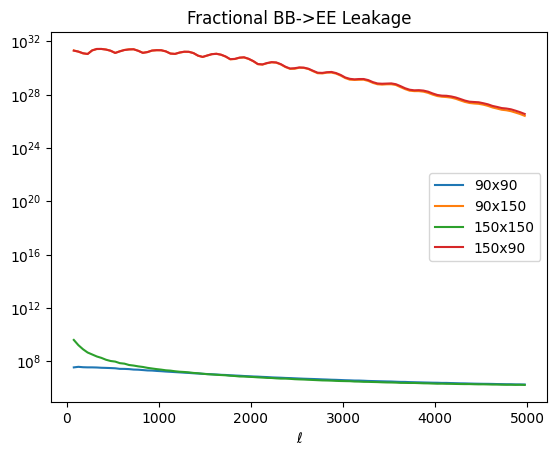

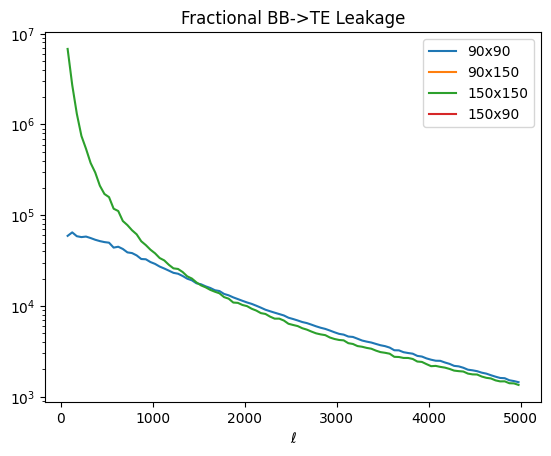

In [47]:
plt.plot(ell_CHLAT_BB_1, spectra_CHLAT_BB_1['TT'], label='90x90')
plt.plot(ell_CHLAT_BB_2, spectra_CHLAT_BB_2['TT'], label='90x150')
plt.plot(ell_CHLAT_BB_3, spectra_CHLAT_BB_3['TT'], label='150x150')
plt.plot(ell_CHLAT_BB_4, spectra_CHLAT_BB_4['TT'], label='150x90')
plt.title('Fractional BB->TT Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

plt.plot(ell_CHLAT_BB_1, spectra_CHLAT_BB_1['EE'], label='90x90')
plt.plot(ell_CHLAT_BB_2, spectra_CHLAT_BB_2['EE'], label='90x150')
plt.plot(ell_CHLAT_BB_3, spectra_CHLAT_BB_3['EE'], label='150x150')
plt.plot(ell_CHLAT_BB_4, spectra_CHLAT_BB_4['EE'], label='150x90')
plt.title('Fractional BB->EE Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

plt.plot(ell_CHLAT_BB_1, spectra_CHLAT_BB_1['TE'], label='90x90')
plt.plot(ell_CHLAT_BB_2, spectra_CHLAT_BB_2['TE'], label='90x150')
plt.plot(ell_CHLAT_BB_3, spectra_CHLAT_BB_3['TE'], label='150x150')
plt.plot(ell_CHLAT_BB_4, spectra_CHLAT_BB_4['TE'], label='150x90')
plt.title('Fractional BB->TE Leakage')
plt.yscale('log')
plt.xlabel('$\ell$')
plt.legend()
plt.show()

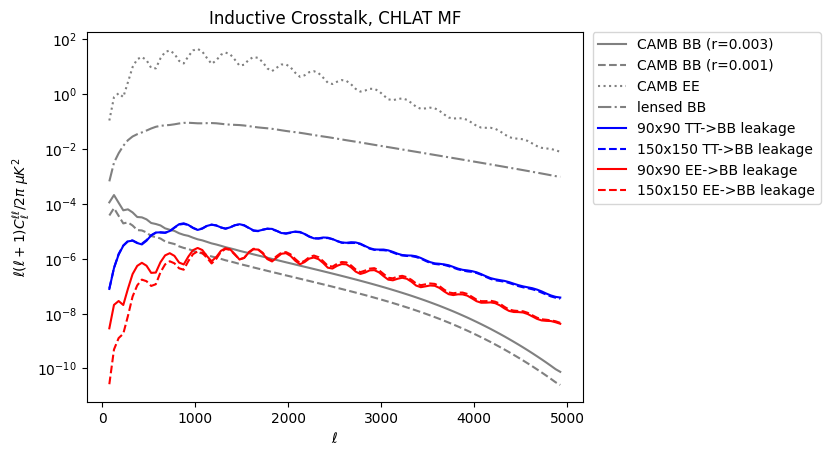

In [96]:
#Order of magnitude compared to CAMB spectra
plt.plot(binned_ell, binned_BB,'-',color='gray',label='CAMB BB (r=0.003)') 
plt.plot(binned_ell, binned_BB001,'--',color='gray',label='CAMB BB (r=0.001)')
plt.plot(binned_ell, binned_EE,':',color='gray',label='CAMB EE')  
plt.plot(binned_ell,binned_BB_lense,'-.',color='gray',label='lensed BB') 

plt.plot(binned_ell, binned_TT*(spectra_CHLAT_TT_1['BB']),'-',color='blue',label='90x90 TT->BB leakage')
plt.plot(binned_ell, binned_TT*(spectra_CHLAT_TT_3['BB']),'--',color='blue',label='150x150 TT->BB leakage')

plt.plot(binned_ell, binned_EE*(spectra_CHLAT_EE_1['BB']),'-',color='red',label='90x90 EE->BB leakage')
plt.plot(binned_ell, binned_EE*(spectra_CHLAT_EE_3['BB']),'--',color='red',label='150x150 EE->BB leakage')


plt.yscale('log')
plt.title('Inductive Crosstalk, CHLAT MF')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)C_\ell^{\ell\ell}/2\pi$ $\mu K^2$')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()